In [233]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, ward, fcluster, cophenet
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [234]:
pwd = os.getcwd()
pwd

'd:\\Python\\analiza-wielowymiarowa\\analiza-wielowymiarowa'

## 1. Analiza wstępna

### Wczytanie i motyfikacja danych

In [235]:
data = pd.read_excel(pwd + '/data.xlsx').round(2)
data

,Województwo,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,Dolnośląskie,1.86,0.66,4.37,2.90,6.45,5.42,6.94,1.73,2.35,2.15,1.11,2.99,0.80,5.59,1.20,0.82
1,Kujawsko-Pomorskie,2.80,0.85,3.40,2.25,3.82,2.86,5.65,2.55,2.28,1.90,0.70,2.35,0.53,1.66,0.77,1.36
2,Lubelskie,3.01,0.67,4.47,1.57,3.85,2.44,6.56,1.41,2.60,1.73,0.58,2.35,0.23,3.36,0.48,1.01
3,Lubuskie,1.60,0.52,2.71,2.50,5.06,3.37,4.95,1.23,1.73,2.30,0.56,4.94,0.15,6.97,0.86,1.32
4,Łódzkie,2.27,0.91,5.02,1.93,9.22,3.08,6.22,1.01,1.96,1.77,0.61,2.14,2.24,3.47,0.63,0.77
5,Małopolskie,1.88,0.78,4.15,2.19,6.49,4.08,9.27,1.20,3.12,2.08,0.67,2.86,0.47,5.23,0.67,0.77
6,Mazowieckie,2.11,0.73,5.07,2.33,5.25,5.41,9.14,1.05,2.54,1.55,0.97,2.34,0.94,2.37,0.62,0.74
7,Opolskie,2.16,0.55,2.81,1.73,4.62,1.87,5.01,1.60,2.11,2.52,0.55,2.67,1.65,2.56,0.97,0.87
8,Podkarpackie,3.31,1.08,3.17,1.29,5.09,2.18,5.82,1.03,2.88,3.09,0.66,3.83,0.10,2.67,0.53,0.87
9,Podlaskie,2.71,0.77,4.85,1.99,2.90,3.46,6.08,0.89,2.26,1.44,0.62,3.12,0.10,1.34,0.63,1.34


In [236]:
data.columns

Index(['Województwo', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16'],
      dtype='object')

In [237]:
data = data.set_index('Województwo').round(2)
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
Województwo,,,,,,,,,,,,,,,,
Dolnośląskie,1.86,0.66,4.37,2.90,6.45,5.42,6.94,1.73,2.35,2.15,1.11,2.99,0.80,5.59,1.20,0.82
Kujawsko-Pomorskie,2.80,0.85,3.40,2.25,3.82,2.86,5.65,2.55,2.28,1.90,0.70,2.35,0.53,1.66,0.77,1.36
Lubelskie,3.01,0.67,4.47,1.57,3.85,2.44,6.56,1.41,2.60,1.73,0.58,2.35,0.23,3.36,0.48,1.01
Lubuskie,1.60,0.52,2.71,2.50,5.06,3.37,4.95,1.23,1.73,2.30,0.56,4.94,0.15,6.97,0.86,1.32
Łódzkie,2.27,0.91,5.02,1.93,9.22,3.08,6.22,1.01,1.96,1.77,0.61,2.14,2.24,3.47,0.63,0.77
Małopolskie,1.88,0.78,4.15,2.19,6.49,4.08,9.27,1.20,3.12,2.08,0.67,2.86,0.47,5.23,0.67,0.77
Mazowieckie,2.11,0.73,5.07,2.33,5.25,5.41,9.14,1.05,2.54,1.55,0.97,2.34,0.94,2.37,0.62,0.74
Opolskie,2.16,0.55,2.81,1.73,4.62,1.87,5.01,1.60,2.11,2.52,0.55,2.67,1.65,2.56,0.97,0.87
Podkarpackie,3.31,1.08,3.17,1.29,5.09,2.18,5.82,1.03,2.88,3.09,0.66,3.83,0.10,2.67,0.53,0.87


### Opis i filtrowanie danych

In [238]:
def cv(col):
    means = col.mean()
    stds = col.std()
    return (stds / means) * 100
   
def gini(col):
    col = sorted(col)
    n = len(col)
    numerator = sum((i+1) * val for i, val in enumerate(col))
    denominator = sum(col)
    return (2 * numerator / (n * denominator)) - (n + 1) / n

def skewness(col):
    return pd.Series(col).skew()

In [239]:
def describe_v2(dataframe):
    cv_values = dataframe.apply(cv)
    gini_values = dataframe.apply(gini)
    skewness_values = dataframe.apply(skewness)
    
    described_data = dataframe.describe()
    
    indicators = pd.DataFrame([cv_values, gini_values, skewness_values], index=['CV', 'Gini', 'Skewness'])
    described_data_v2 = pd.concat([described_data, indicators])
    return described_data_v2

#### Opis danych:

In [240]:
described_data = describe_v2(data)
described_data.round(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
count,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00
mean,2.29,0.69,3.90,2.16,5.46,3.49,6.39,1.37,2.52,2.05,0.72,3.04,0.76,3.70,0.84,0.99
std,0.61,0.27,0.77,0.52,1.49,1.43,1.32,0.41,0.59,0.47,0.17,0.71,0.80,2.09,0.31,0.27
min,1.32,0.24,2.71,1.29,2.90,1.12,4.95,0.89,1.73,1.44,0.55,2.14,0.07,1.34,0.48,0.64
25%,1.85,0.51,3.34,1.92,4.60,2.38,5.58,1.15,2.22,1.70,0.60,2.52,0.21,2.35,0.63,0.77
50%,2.22,0.66,4.05,2.09,5.30,3.42,6.14,1.25,2.42,1.99,0.68,2.92,0.41,2.94,0.72,0.92
75%,2.82,0.80,4.39,2.33,6.46,4.23,6.65,1.46,2.72,2.37,0.76,3.31,1.03,5.32,1.03,1.11
max,3.31,1.32,5.07,3.50,9.22,6.31,9.27,2.55,4.16,3.09,1.11,4.94,2.64,8.37,1.44,1.54
CV,26.61,39.46,19.75,24.03,27.21,40.91,20.66,30.00,23.30,22.69,23.05,23.46,106.02,56.53,36.27,27.26
Gini,0.15,0.21,0.11,0.12,0.14,0.22,0.11,0.15,0.12,0.12,0.12,0.12,0.53,0.30,0.19,0.15


In [241]:
cv = described_data.loc['CV']
filtered_cv = cv[(cv <=10)].index.tolist()
filtered_cv

[]

In [242]:
skew = described_data.loc['Skewness']
filtered_skew = skew[(skew < -2) | (skew > 2)].index.tolist()
filtered_skew

[]

In [243]:
g = described_data.loc['Gini']
filtered_g = g[(g >= 0) & (g <= 0.1)].index.tolist()
filtered_g

[]

In [244]:
columns_to_drop = filtered_cv + filtered_skew + filtered_g
columns_to_drop = list(set(columns_to_drop))
(f'Zmienne do odrzucenia: {columns_to_drop}')

'Zmienne do odrzucenia: []'

W ramach przyjętych kryteriów decyzyjnych, zmienna zostaje odrzucona, jeżeli współczynnik Giniego mieści się w przedziale od 0 do 0,1 - wartości te wskazują na bardzo niską nierówność w dystrybucji cechy. Cechy z współczynnikiem zmienności mniejszym niż 10 są uznawane za mało zmienne, a skośność poza przedziałem od -2 do 2 wskazywałaby na istotną asymetrię rozkładu, która może negatywnie wpływać na wyniki analizy. Analizując przedstawione dane, nie odrzucono żadnej z badanych cech na podstawie tych statystyk.

#### Wariancje zmiennych

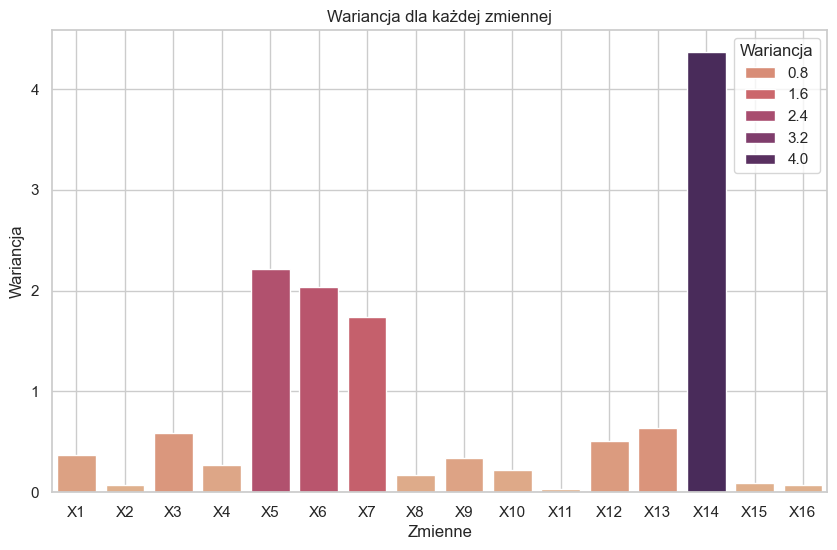

In [245]:
var = data.var()

var_df = var.reset_index()
var_df.columns = ['Zmienna', 'Wariancja']

plt.figure(figsize=(10, 6))
sns.barplot(x='Zmienna', y='Wariancja', data=var_df, hue='Wariancja', palette='flare', dodge=False)
plt.title('Wariancja dla każdej zmiennej')
plt.xlabel('Zmienne')
plt.ylabel('Wariancja')
plt.grid(True)
plt.show()

Na wykresie rozkładu wariancji analizowanych cech, dominują cechy o niskiej wariancji, co świadczy o stosunkowej jednorodności danych we wskazanych obszarach obszarach. Cechy  X5, X6 oraz X7, charakteryzują się większym rozproszeniem wartości, sugerującym większe zróżnicowanie w zakresie liczby wypadków na 10 tys. ludności, liczby mieszkań oddanych do użytkowania na 1 tys. ludności oraz mediany cen mieszkań. Najbardziej rzuca się w oczy wariancja cechy X14, dotyczącej długości linii komunikacji miejskiej na 10 tys. mieszkańców, która wyraźnie odstaje od wariancji pozostałych zmiennych.

#### Ustalenie liczby wierszy i kolumn dla subplotów

In [246]:
liczba_cech = len(data.columns)
liczba_kolumn = 4
liczba_wierszy = 4

### Wykresy słupkowe

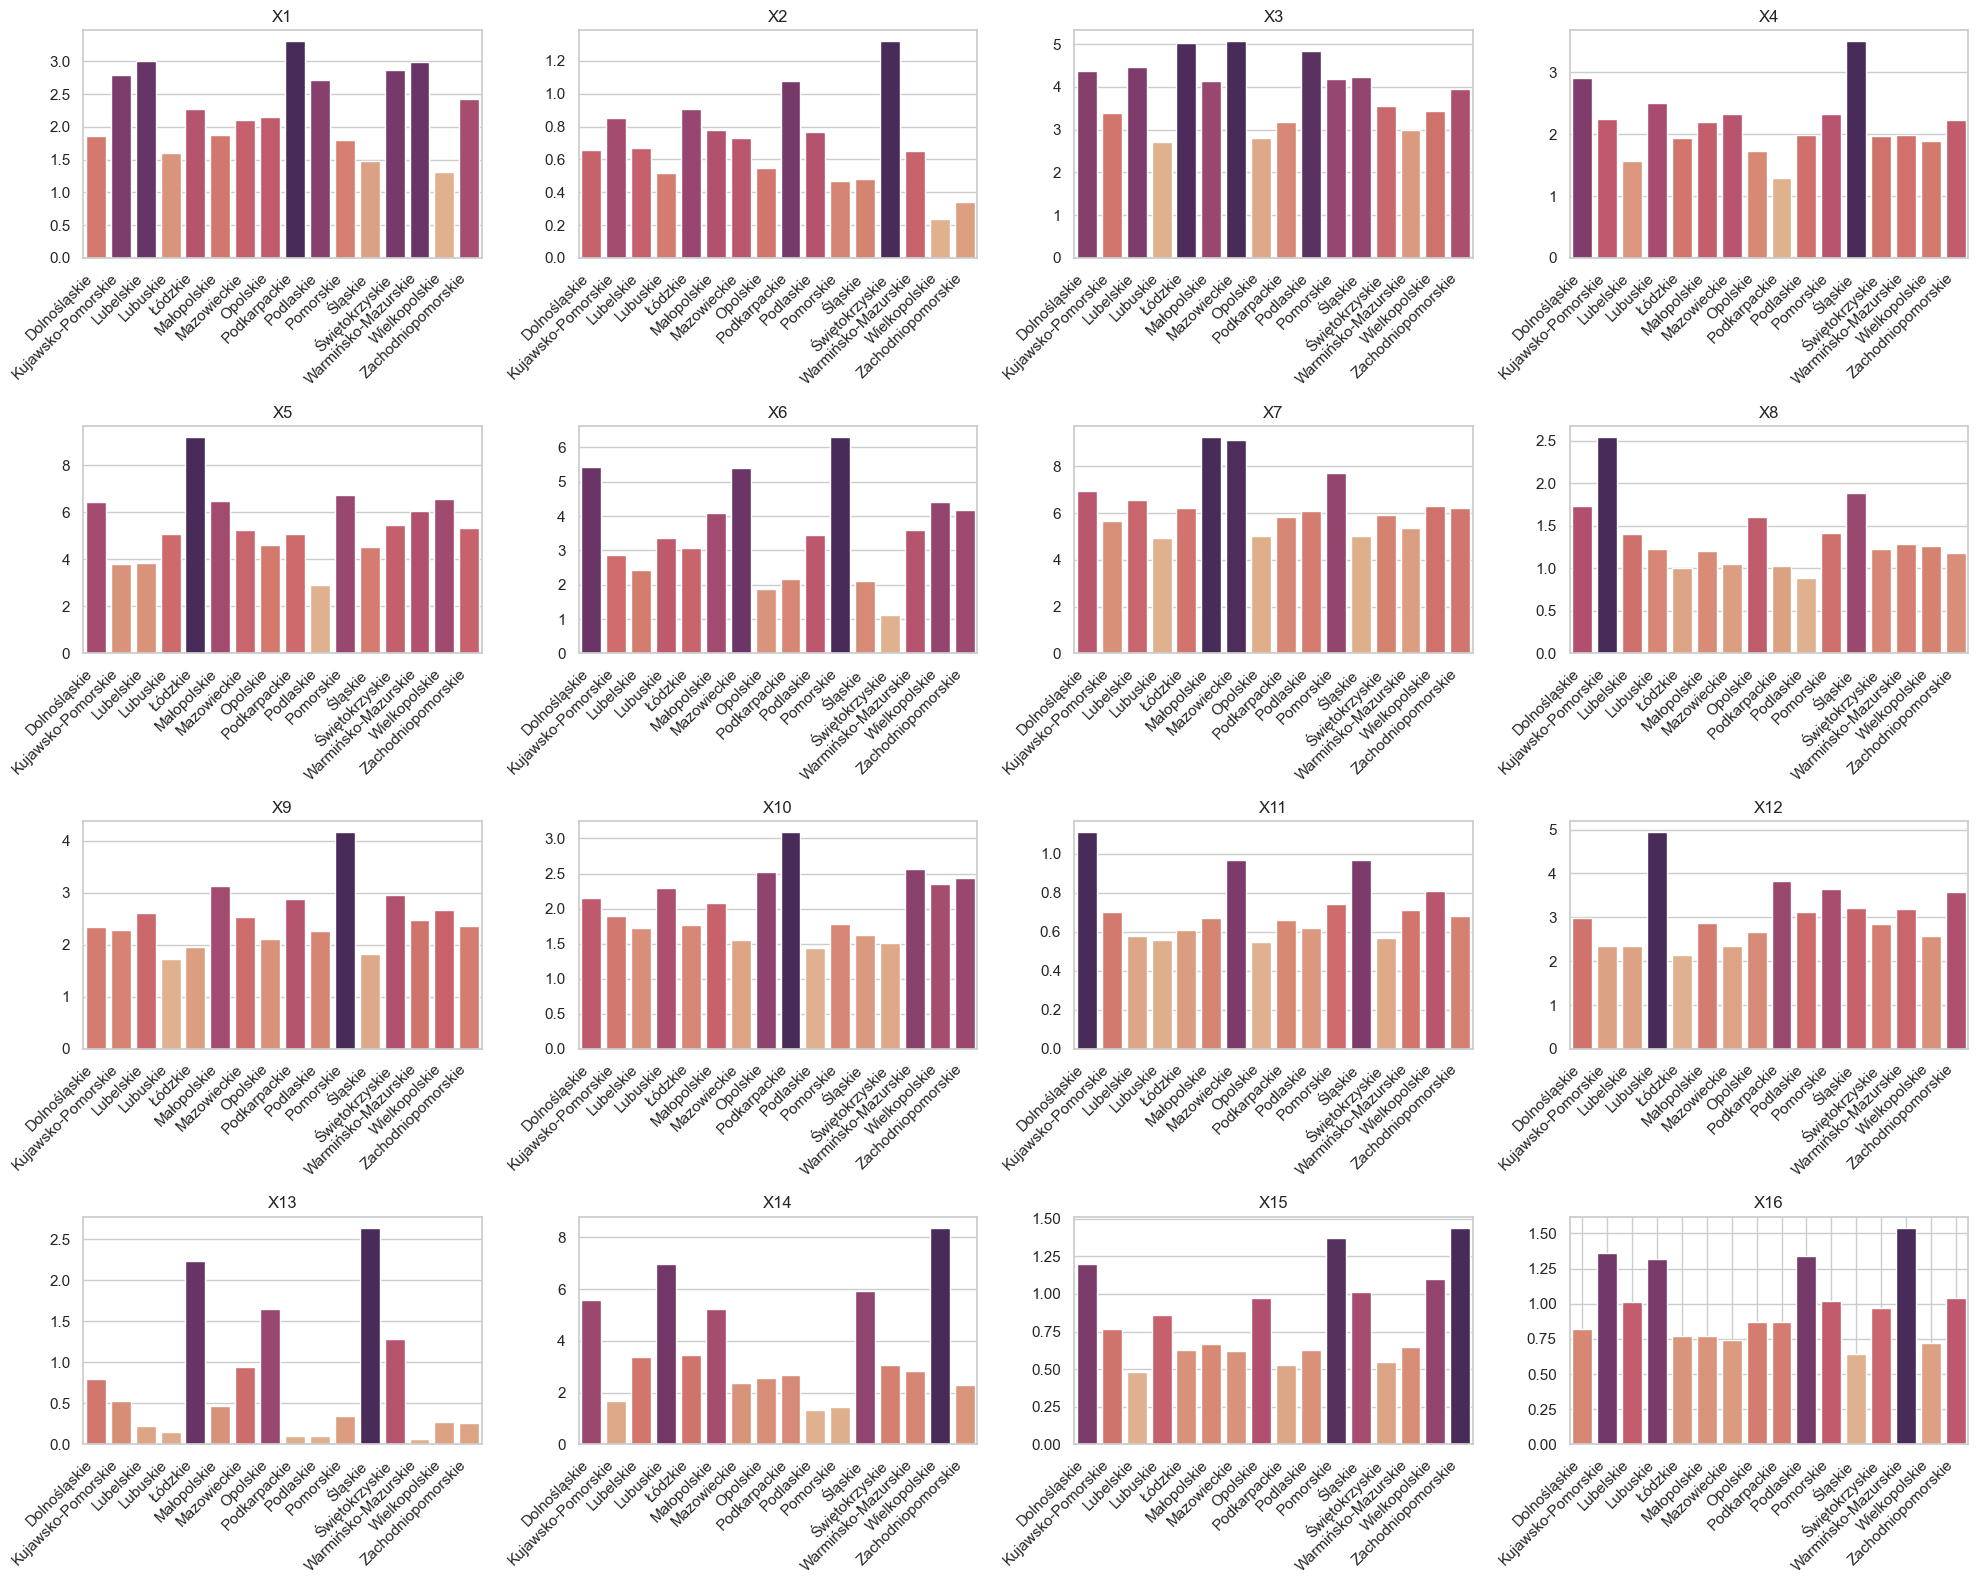

In [247]:
plt.figure(figsize=(20, 4 * liczba_wierszy))
for i, cecha in enumerate(data.columns, 1):
    plt.subplot(liczba_wierszy, liczba_kolumn, i)
    palette = sns.color_palette("flare", as_cmap=True)
    sns.barplot(x=data.index, y=data[cecha], legend=False, hue=data[cecha], palette=palette)
    plt.xlabel('')
    plt.ylabel('')

    plt.xticks(rotation=45, ha='right')
    plt.title(cecha)

plt.tight_layout()
plt.grid(True)
plt.show()

### Histogramy

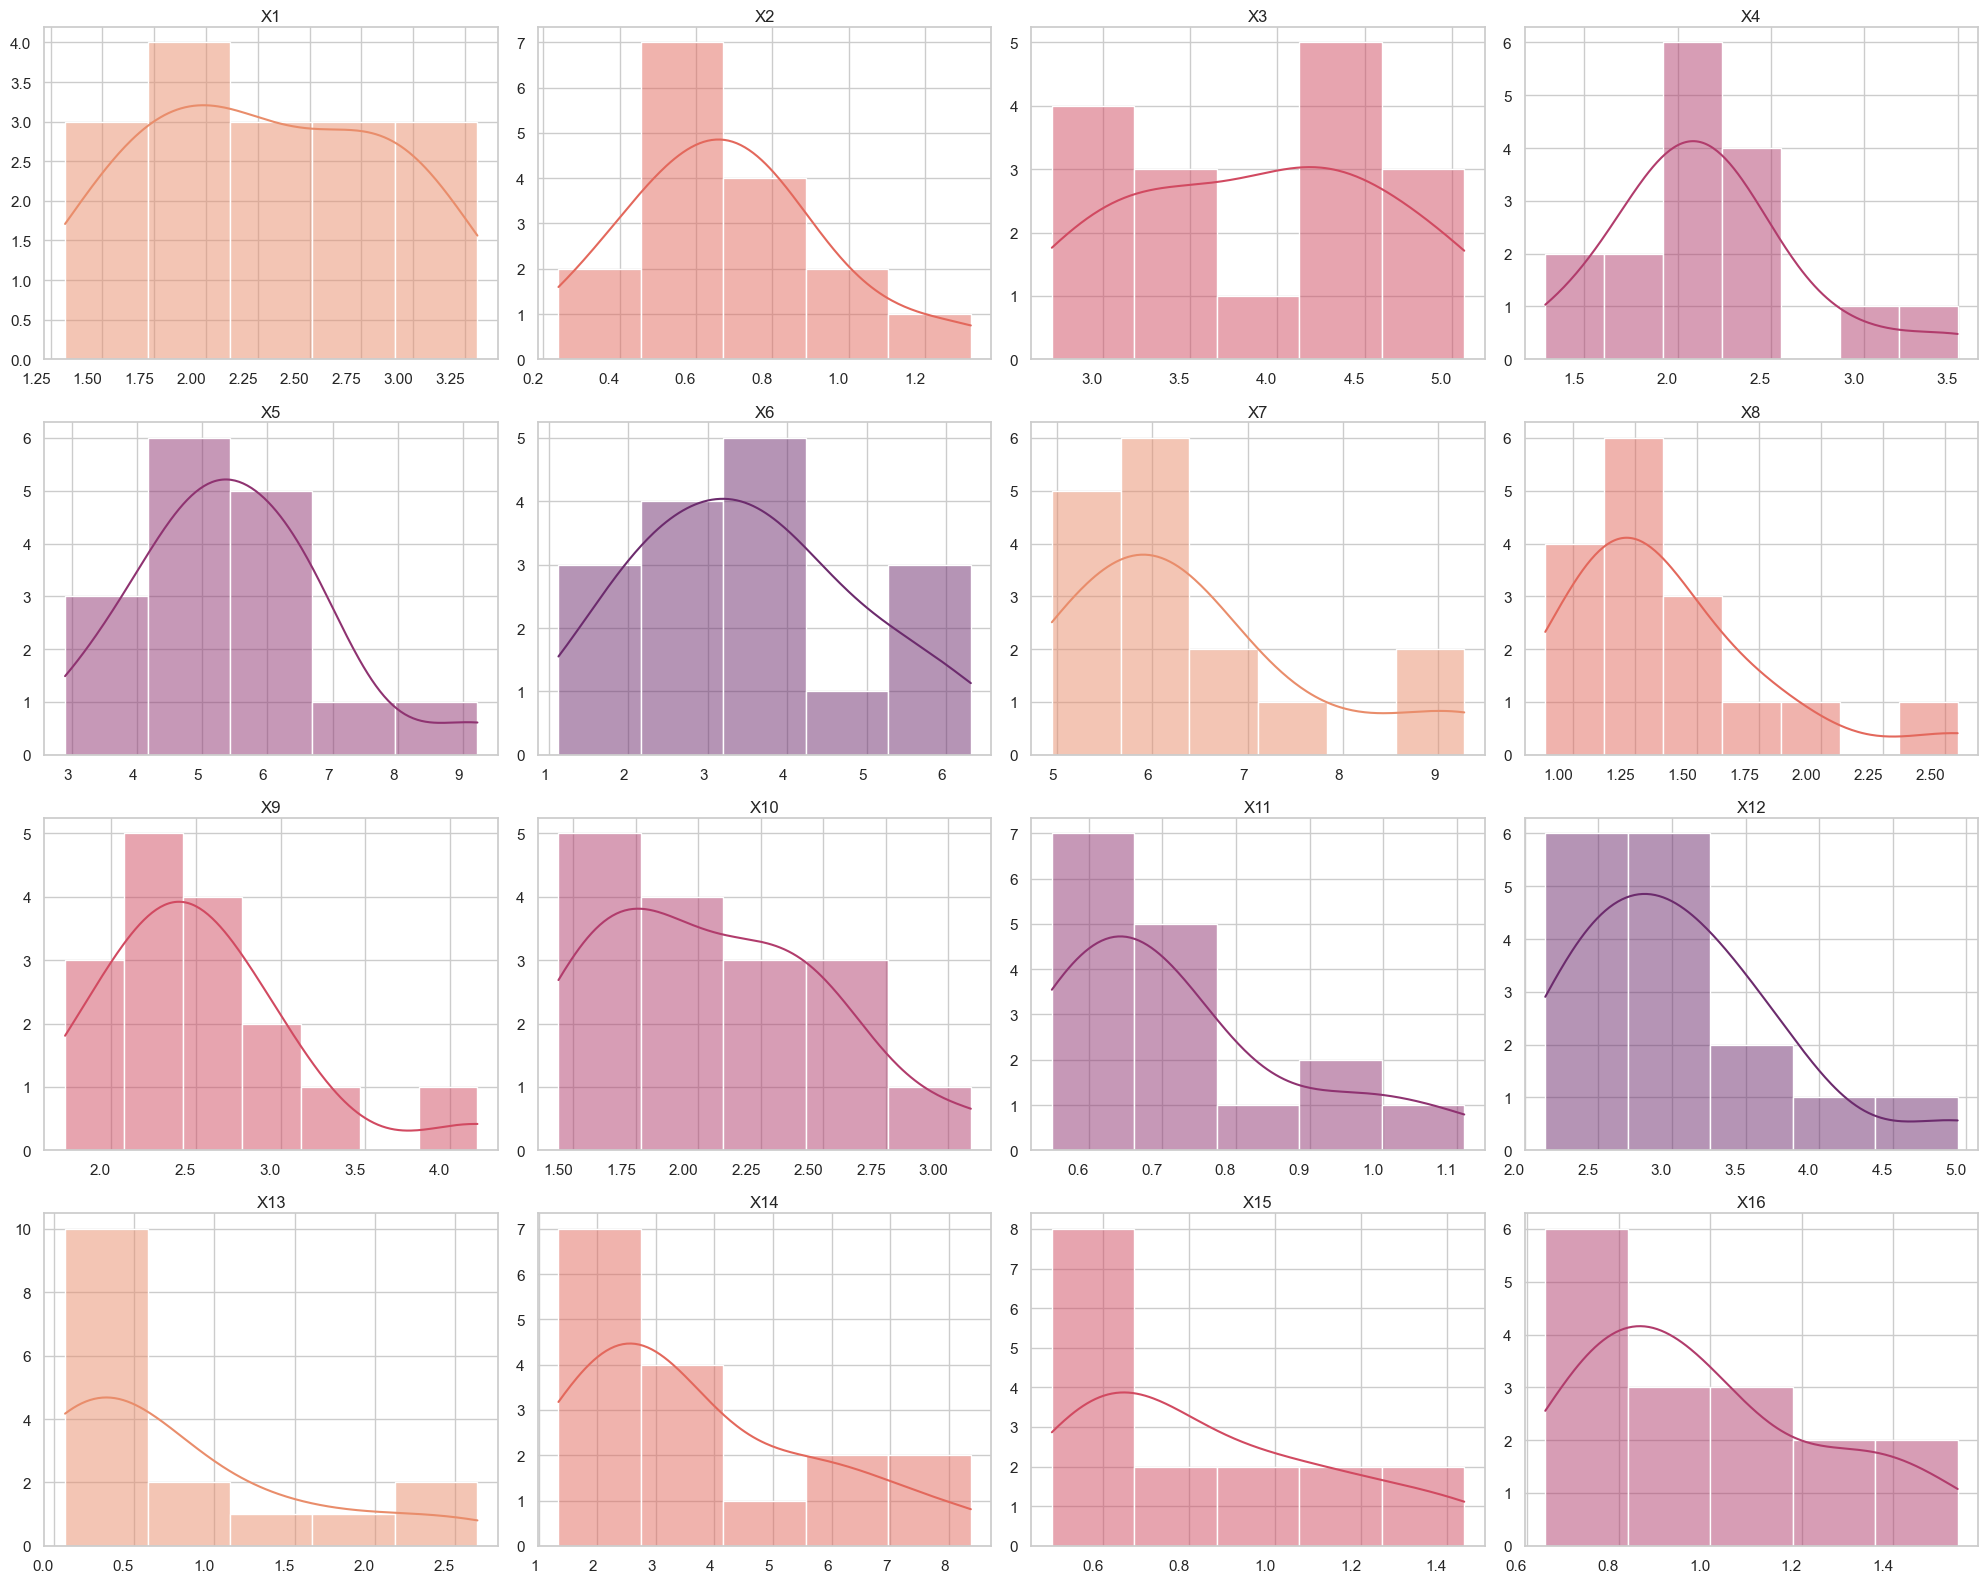

In [248]:
plt.figure(figsize=(20, 4 * liczba_wierszy))
for i, cecha in enumerate(data.columns):
    ax = plt.subplot(liczba_wierszy, liczba_kolumn, i + 1)
    color = sns.color_palette("flare")[i % len(sns.color_palette("flare"))]
    sns.histplot(data=data, x=cecha, kde=True, color=color)
    plt.xlabel(cecha)
    plt.ylabel('')
    plt.xticks(ha='right')
    
    ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.grid(True)
plt.show()

### Wykresy pudełkowe

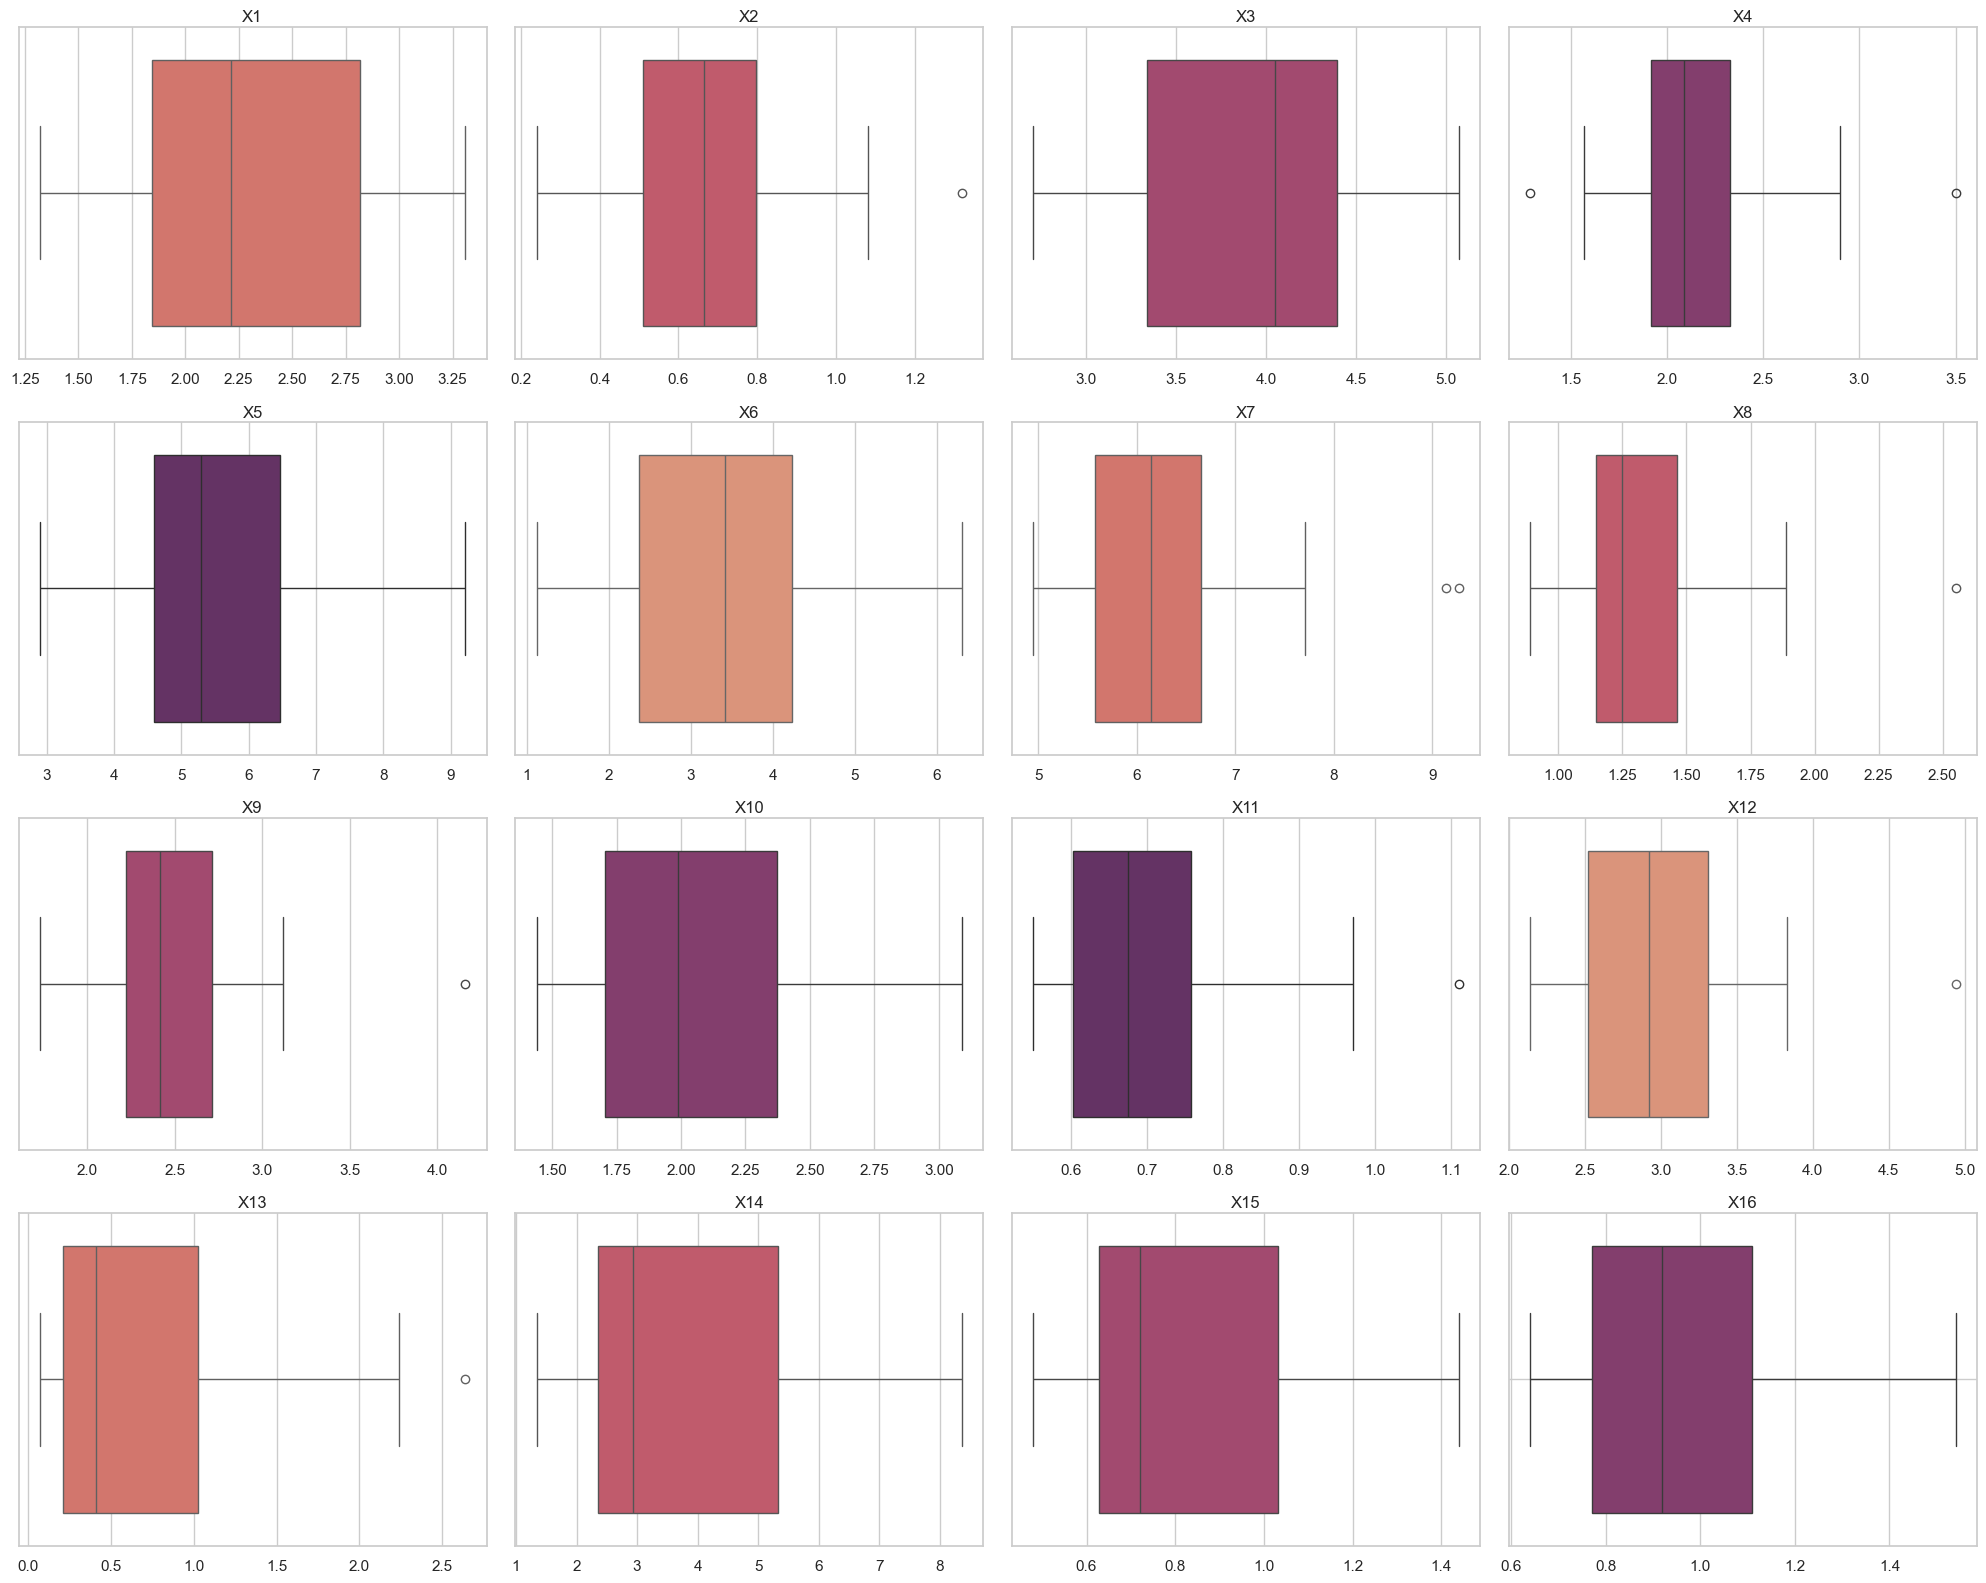

In [249]:
plt.figure(figsize=(20, 4 * liczba_wierszy))
for i, cecha in enumerate(data.columns, 1):
    ax = plt.subplot(liczba_wierszy, liczba_kolumn, i)
    color = sns.color_palette("flare")[i % len(sns.color_palette("flare"))]
    sns.boxplot(data[cecha], orient='h', color=color)
    ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.grid(True) 
plt.show()

### Macierz korelacji

In [250]:
corr = data.corr()

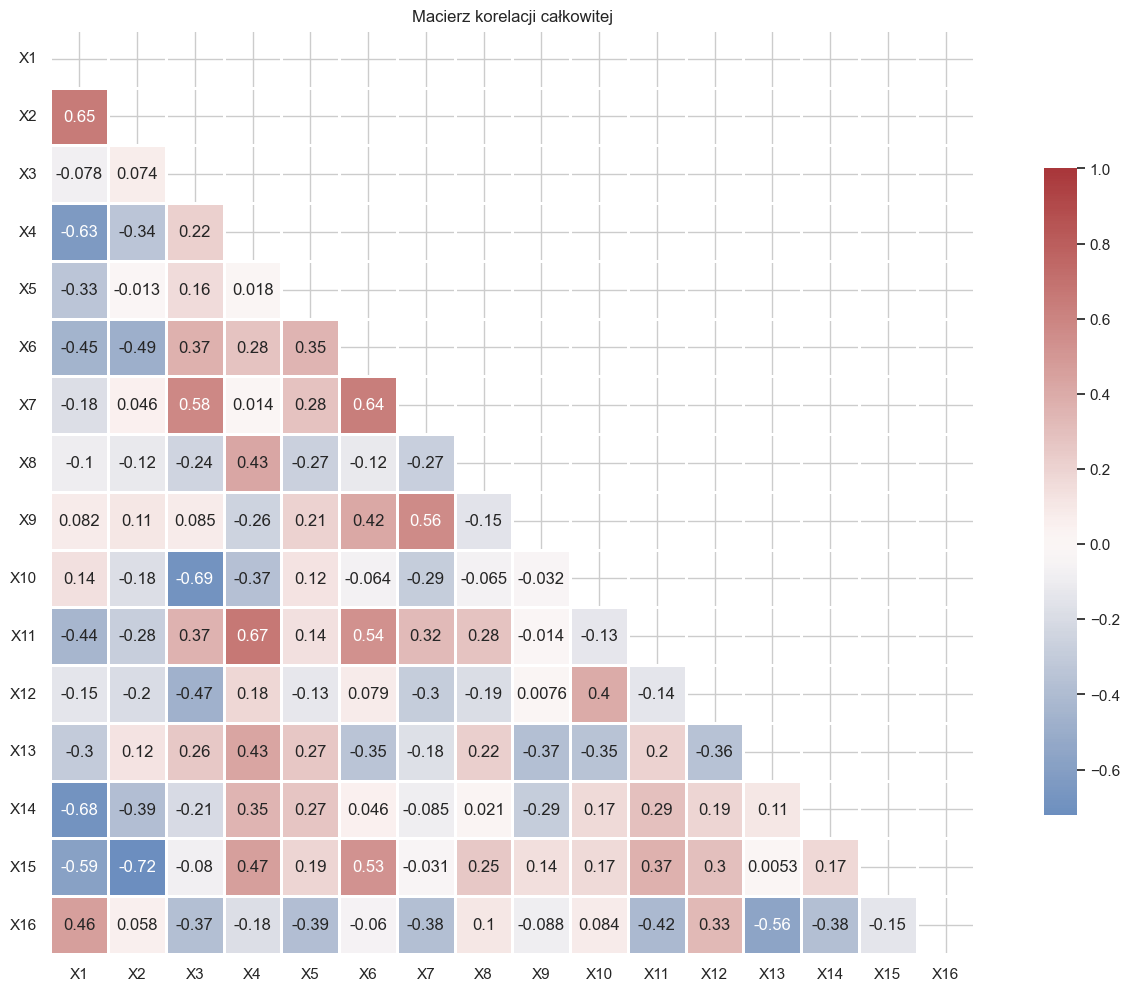

In [251]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(18, 12))
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .7}, annot=True)
plt.yticks(rotation=0)
plt.title('Macierz korelacji całkowitej')
plt.grid(True)
plt.show()

W analizowanym zbiorze danych, najwyższą korelacją charakteryzuje się para zmiennych X11 i X4, najniższą para X15 i X2.

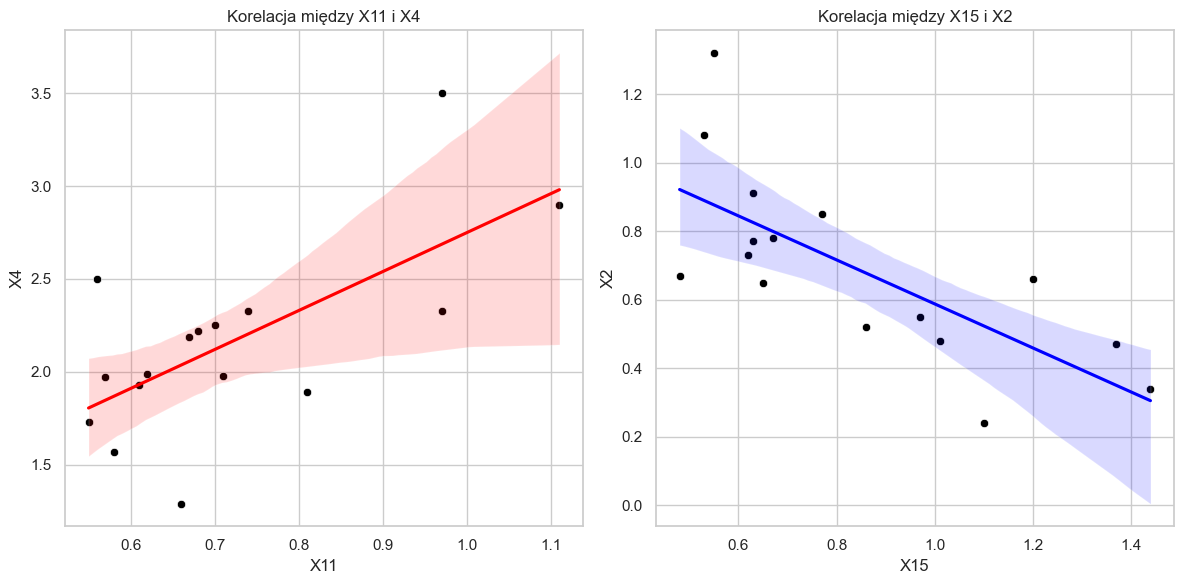

In [252]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x="X11", y="X4", data=data, color="black")
sns.regplot(x="X11", y="X4", data=data, scatter=False, color="red")
plt.title("Korelacja między X11 i X4")

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(x="X15", y="X2", data=data, color="black")
sns.regplot(x="X15", y="X2", data=data, scatter=False, color="blue")
plt.title("Korelacja między X15 i X2")

plt.grid(True)
plt.tight_layout()
plt.show()

Cechy X11 i X4 wykazują dodatni związek, co oznacza, że wyższe wartości jednej zmiennej są zazwyczaj powiązane z wyższymi wartościami drugiej.  Drugi wykres ilustruje korelację między X15 a X2, prezentując ujemny związek. Oznacza to, że wzrost wartości dla X15 ma tendencję do wiązania się ze spadkiem wartości X2. 

## 2. PCA

In [253]:
corr = data.corr()

W celu zwiększenia efektywności PCA, należy przeprowadzić selekcję cech na podstawie ich korelacji. Z analizy wykluczono cechy, które wykazują korelację powyżej wartości 0,65.

In [254]:
mask = (corr.abs() > 0.65) & (corr != 1.0)
pca_variables = corr.columns[mask.any()].tolist()
len(pca_variables)

8

In [255]:
data_pca = data[pca_variables]
data_pca

,X1,X2,X3,X4,X10,X11,X14,X15
Województwo,,,,,,,,
Dolnośląskie,1.86,0.66,4.37,2.90,2.15,1.11,5.59,1.20
Kujawsko-Pomorskie,2.80,0.85,3.40,2.25,1.90,0.70,1.66,0.77
Lubelskie,3.01,0.67,4.47,1.57,1.73,0.58,3.36,0.48
Lubuskie,1.60,0.52,2.71,2.50,2.30,0.56,6.97,0.86
Łódzkie,2.27,0.91,5.02,1.93,1.77,0.61,3.47,0.63
Małopolskie,1.88,0.78,4.15,2.19,2.08,0.67,5.23,0.67
Mazowieckie,2.11,0.73,5.07,2.33,1.55,0.97,2.37,0.62
Opolskie,2.16,0.55,2.81,1.73,2.52,0.55,2.56,0.97
Podkarpackie,3.31,1.08,3.17,1.29,3.09,0.66,2.67,0.53


In [256]:
data_pca_names = {
"X1": "Liczba bezrobotnych na 100 ludności",
"X2": "Liczba przychodni na 10 tyś ludności",
"X3": "Liczba lekarzy przypadająca na 1 osobę w tysiącach",
"X4": "Liczba przestępstw w ludności (w setkach)",
"X10": "Liczba obiektów sporotwych na 10 tys mieszkańców",
"X11": "Liczba miejsc na widowni w kinach przypadająca na 100 mieszkańców",
"X14": "Długość lini komunikacji miejskiej na 10 tys mieszkańców",
"X15": "Osoby bezdomne w noclegowiskach na 1 tyś ludności",
}

df_data_pca_names = pd.DataFrame(list(data_pca_names.values()), index=data_pca_names.keys(), columns=['Cecha'])
df_data_pca_names

,Cecha
X1,Liczba bezrobotnych na 100 ludności
X2,Liczba przychodni na 10 tyś ludności
X3,Liczba lekarzy przypadająca na 1 osobę w tysią...
X4,Liczba przestępstw w ludności (w setkach)
X10,Liczba obiektów sporotwych na 10 tys mieszkańców
X11,Liczba miejsc na widowni w kinach przypadająca...
X14,Długość lini komunikacji miejskiej na 10 tys m...
X15,Osoby bezdomne w noclegowiskach na 1 tyś ludności


In [257]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)


pca = PCA(n_components=None)
transformed = pca.fit_transform(data_scaled)
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [258]:
a = pca.explained_variance_
b = pca.explained_variance_ratio_
c = np.cumsum(b)

index = [f"PC{i+1}" for i in range(len(a))]

df_eigenvalues = pd.DataFrame({'Wartości własne (wyjaśniona wariancja)': a, 
                   'Stosunek wyjaśnionej wariancji': b, 
                   'Suma wyjaśnionej wariancji': c}, 
                   index=index)
df_eigenvalues

,Wartości własne (wyjaśniona wariancja),Stosunek wyjaśnionej wariancji,Suma wyjaśnionej wariancji
PC1,3.626519,0.424983,0.424983
PC2,2.183627,0.255894,0.680876
PC3,0.998936,0.117063,0.797939
PC4,0.740440,0.086770,0.884710
PC5,0.527656,0.061835,0.946544
PC6,0.226194,0.026507,0.973051
PC7,0.122073,0.014305,0.987357
PC8,0.107889,0.012643,1.000000


Wartości własne (*Eigenvalues*) przedstawiają ilość wariancji zawartej w danych, którą wyjaśnia poszczególna główna składowa. Pierwsza składowa wyjaśnia wariancję o wartości 3,61, co oznacza, że posiada ona największy udział w ogólnej zmienności danych. 

Stosunek wyjaśnionej wariancji (*Explained Variance Ratio*) to procentowa wartość wariancji wyjaśnionej przez każdą główną składową. Pierwsza główna składowa wyjaśnia 42% całkowitej wariancji obserwowanej w danych, a druga 26%, itd.

Kumulatywna suma wyjaśnionej wariancji (*Cumulative Explained Variance*) przedstawia skumulowany procent wariancji wyjaśnionej przez kolejne główne składowe. Pierwsze trzy wartości to odpowiednio 42%, 68% i 80%, to oznacza to, że pierwsza składowa wyjaśnia 42% wariancji, pierwsza i druga razem wyjaśniają 68% wariancji, natomiast trzy pierwsze składowe w sumie odpowiadają za 80% wariancji w zestawie danych.

### Wykres osypiska

Jedną z metod wyznaczenia ilości głównych składowych do dalszych analiz, jest *kryterium Kaisera*. Zgodnie z tym kryterium, należy wybrać tylko tylko te składowe, których wartości własne są większe niż 1. 

In [259]:
num_components = len(pca.explained_variance_ratio_)
explained_variance = (range(1, num_components + 1))
cumulative_sum = c

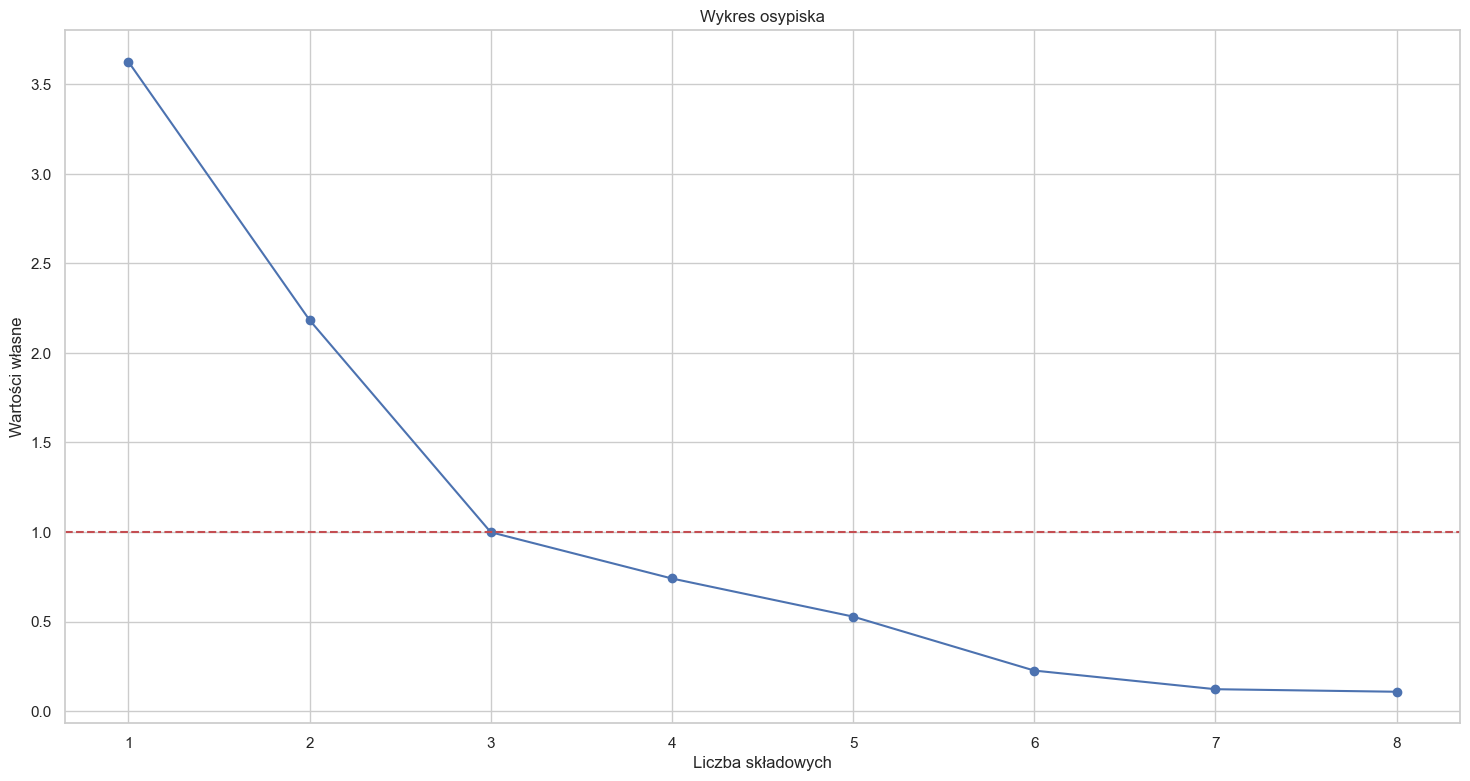

In [260]:
plt.figure(figsize=(18, 9))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b')
plt.axhline(y=1, color='r', linestyle='--')
plt.title('Wykres osypiska')
plt.xlabel('Liczba składowych')
plt.ylabel('Wartości własne')
plt.grid(True)
plt.show()

In [261]:
eigenvalues

array([3.62651945, 2.18362654, 0.99893604, 0.74043954, 0.52765585,
       0.22619404, 0.1220728 , 0.10788909])

### Wektory własne i ładunki

In [262]:
pca = PCA(n_components=3)
transformed = pca.fit_transform(data_scaled)

In [263]:
df_eigenvectors = pd.DataFrame(
    pca.components_, 
    columns=data_pca.columns,
    index=["PC1", "PC2", "PC3"])

df_eigenvectors.round(4)

,X1,X2,X3,X4,X10,X11,X14,X15
PC1,-0.4878,-0.4018,0.0736,0.4307,-0.0559,0.3725,0.3298,0.3988
PC2,0.0372,0.2444,0.6078,0.2318,-0.6147,0.2300,-0.2240,-0.1865
PC3,0.1951,-0.3412,0.1440,-0.0849,0.0676,-0.0123,-0.7041,0.5631


Widoczne powyżej wektory własne będące liniowymi kombinacjami pierwotnych zimennych, przedstawiają ładunki czynnikowe każdej zmiennej. Ładunki są interpretowane jako korelacje między zmiennymi pierwotnymi, a główną składową. Pozwala to na ocenę, w jakim stopniu każda zmienna przyczynia się do wariancji reprezentowanej przez daną składową. Wartości ładunków bliskie zeru wskazują na niski wkład zmiennej do składowej, natomiast wysokie wartości bezwzględne oznaczają wyższy wkład do składowej.

$$ PC_1 = -0.4886 \cdot X_1 - 0.4032 \cdot X_2 + 0.0738 \cdot X_3 + 0.4309 \cdot X_4 - 0.0559 \cdot X_{10} + 0.3681 \cdot X_{11} + 0.3304 \cdot X_{14} + 0.3998 \cdot X_{15} $$
$$ PC_2 = 0.0385 \cdot X_1 + 0.2444 \cdot X_2 + 0.6077 \cdot X_3 + 0.2322 \cdot X_4 - 0.6137 \cdot X_{10} + 0.2334 \cdot X_{11} - 0.2257 \cdot X_{14} - 0.1831 \cdot X_{15} $$
$$ PC_3 = 0.2018 \cdot X_1 - 0.3373 \cdot X_2 + 0.1413 \cdot X_3 - 0.0890 \cdot X_4 + 0.0774 \cdot X_{10} - 0.0055 \cdot X_{11} - 0.7033 \cdot X_{14} + 0.5630 \cdot X_{15} $$

## 3. Analiza skupień

Pierwszym krokiem w analizie skupień jest obliczenie macierzy odległości między wszystkimi parami obiektów. W celu zastosowania metryki euklidesowej, należy wyeliminować ze zbioru danych cechy o wysokich korelacjach, tak aby jak najlepiej zobrazować różnice w obserwacjach.

In [264]:
data_clustering = data.drop(columns=pca_variables)

In [266]:
data_clustering_names = {
"X5": "Liczba wypadków na 10 tyś ludności",
"X6": "Mieszkania oddane do użytkowania na 1 tyś ludności",
"X7": "Mediana cen mieszkan w tysiącach",
"X8": "Liczba imprez przypadających na 10 tyś mieszkańców",
"X9": "Liczba muzeów przypadająca na 100 tyś mieszkańców",
"X12": "Powierzchnia lasów przypadająca na 10 km^2 powierzchni",
"X13": "Emisja zanieczyszczeń gazowych na 1 tys km^2 ( w tysiącach)",
"X16": "Rodziny, którym przyznano świadczenia z powodu ubóstwa na 100 ludności"
}

df_data_clustering_names = pd.DataFrame(list(data_clustering_names.values()), index=data_clustering_names.keys(), columns=['Cecha'])
df_data_clustering_names

,Cecha
X5,Liczba wypadków na 10 tyś ludności
X6,Mieszkania oddane do użytkowania na 1 tyś ludn...
X7,Mediana cen mieszkan w tysiącach
X8,Liczba imprez przypadających na 10 tyś mieszka...
X9,Liczba muzeów przypadająca na 100 tyś mieszkańców
X12,Powierzchnia lasów przypadająca na 10 km^2 pow...
X13,Emisja zanieczyszczeń gazowych na 1 tys km^2 (...
X16,"Rodziny, którym przyznano świadczenia z powodu..."


### Odległości euklidesowe

In [267]:
new_index = list(range(1, 17))
distance_matrix = pdist(data_clustering, metric='euclidean')

square_distance_matrix = squareform(distance_matrix)

distance_df = pd.DataFrame(square_distance_matrix, index=new_index, columns=new_index)
distance_df_rounded = distance_df.round(2)
distance_df_rounded

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,0.00,4.07,4.09,3.90,4.14,2.87,2.69,4.54,3.95,4.32,2.35,4.71,4.62,2.70,1.48,2.08
2,4.07,0.00,1.62,3.34,5.94,4.99,4.86,2.13,2.72,2.22,5.60,2.80,2.99,2.85,3.57,2.81
3,4.09,1.62,0.00,3.54,5.84,4.21,4.26,2.39,2.15,1.81,5.37,3.24,2.50,2.93,3.40,2.64
4,3.90,3.34,3.54,0.00,5.62,5.28,5.49,3.21,2.23,3.11,5.18,3.46,3.68,2.21,3.47,2.15
5,4.14,5.94,5.84,5.62,0.00,4.77,5.64,5.01,5.13,6.79,5.45,5.15,4.53,4.22,3.67,4.74
6,2.87,4.99,4.21,5.28,4.77,0.00,2.04,5.40,4.32,4.98,3.05,5.74,4.65,4.12,3.05,3.46
7,2.69,4.86,4.26,5.49,5.64,2.04,0.00,5.58,4.95,4.52,3.16,5.78,5.41,4.51,3.37,3.51
8,4.54,2.13,2.39,3.21,5.01,5.40,5.58,0.00,2.37,3.16,6.20,1.25,1.77,2.92,3.78,3.20
9,3.95,2.72,2.15,2.23,5.13,4.32,4.95,2.37,0.00,2.76,5.03,3.11,1.93,2.05,3.03,2.14
10,4.32,2.22,1.81,3.11,6.79,4.98,4.52,3.16,2.76,0.00,5.47,3.71,3.78,3.26,3.93,2.63


### Grupowanie metodą centroidalną

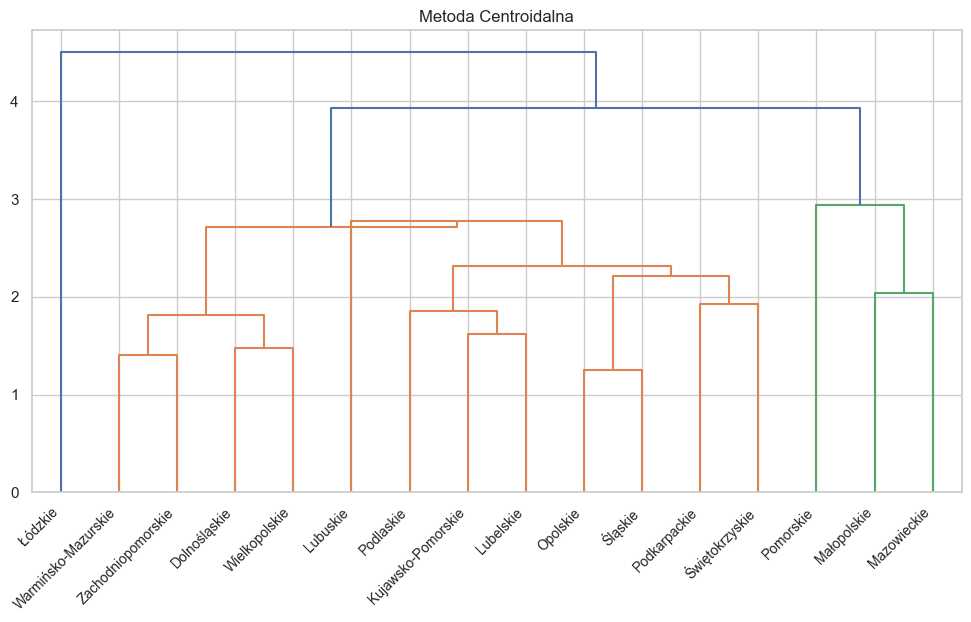

In [268]:
linkage_centroid = linkage(data_clustering, method='centroid', metric='euclidean')

plt.figure(figsize=(12, 6))
plt.title('Metoda Centroidalna')
dendrogram(linkage_centroid, labels=data_clustering.index)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True)
plt.show()

In [269]:
linkage_centroid[:, 2]

array([1.24859922, 1.4091132 , 1.48010135, 1.61861052, 1.8140769 ,
       1.85654922, 1.93028495, 2.04315932, 2.21634835, 2.31712645,
       2.77225724, 2.70907589, 2.93484667, 3.9307276 , 4.50027367])

### Grupowanie metodą Warda

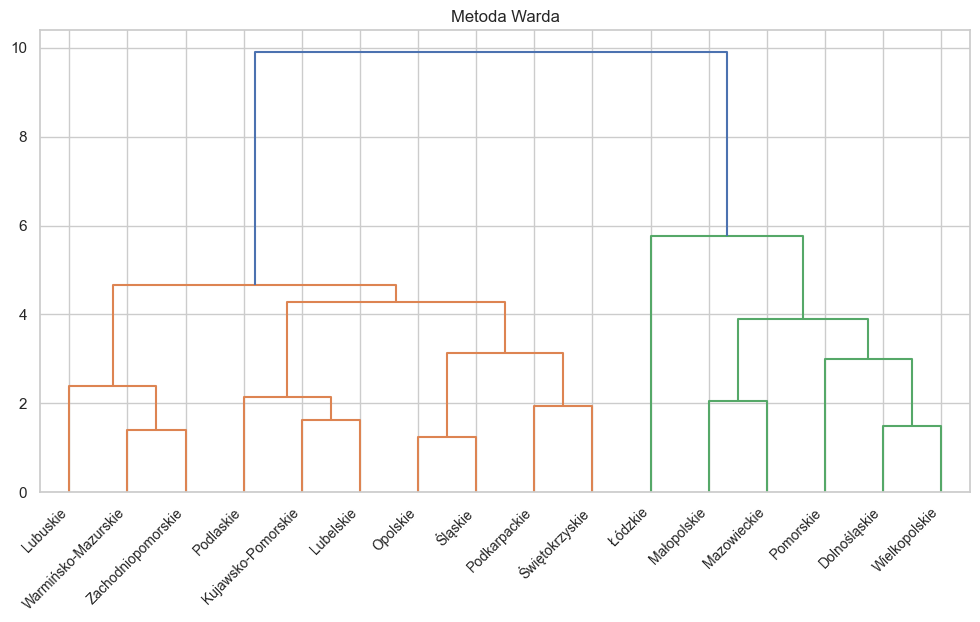

In [270]:
linkage_ward = linkage(data_clustering, method='ward', metric='euclidean')

plt.figure(figsize=(12, 6))
plt.title('Metoda Warda')
dendrogram(linkage_ward, labels=data_clustering.index)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True)
plt.show()

### Grupowanie metodą średniej grupowej

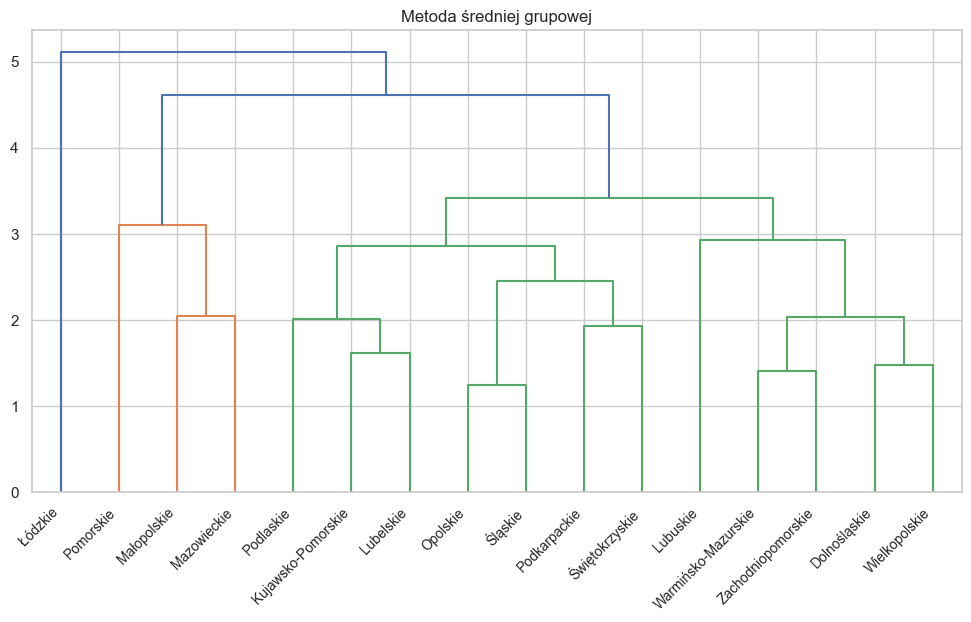

In [271]:
linkage_average = linkage(data_clustering, method='average', metric='euclidean')

plt.figure(figsize=(12, 6))
plt.title('Metoda średniej grupowej')
dendrogram(linkage_average, labels=data_clustering.index)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True)
plt.show()

### Grupowanie metodą najbliższego sąsiada

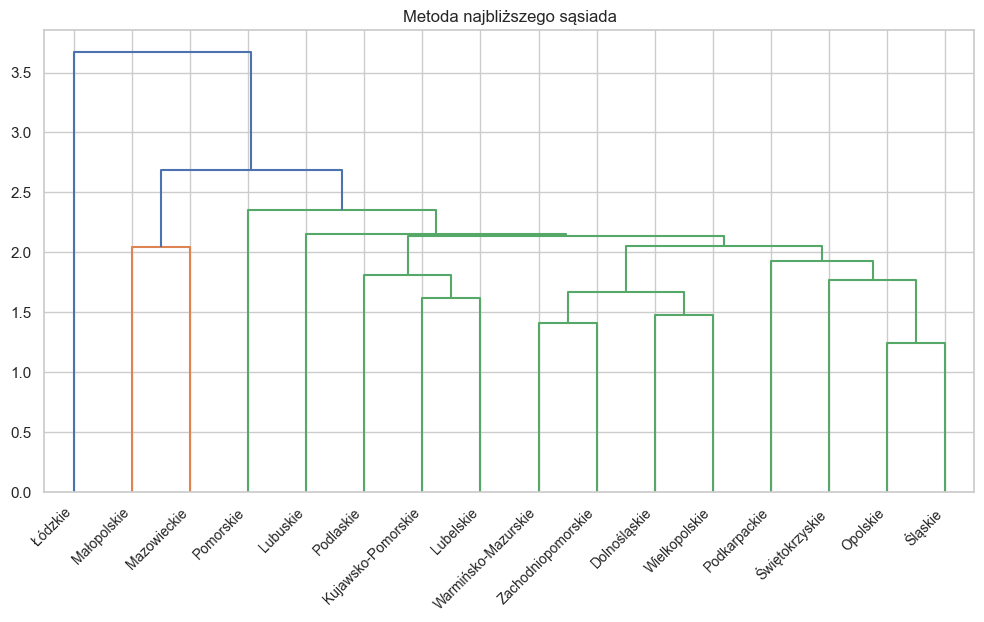

In [272]:
linkage_single= linkage(data_clustering, method='single', metric='euclidean')

plt.figure(figsize=(12, 6))
plt.title('Metoda najbliższego sąsiada')
dendrogram(linkage_single, labels=data_clustering.index)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True)
plt.show()

### Grupowanie metodą najdalszego sąsiada

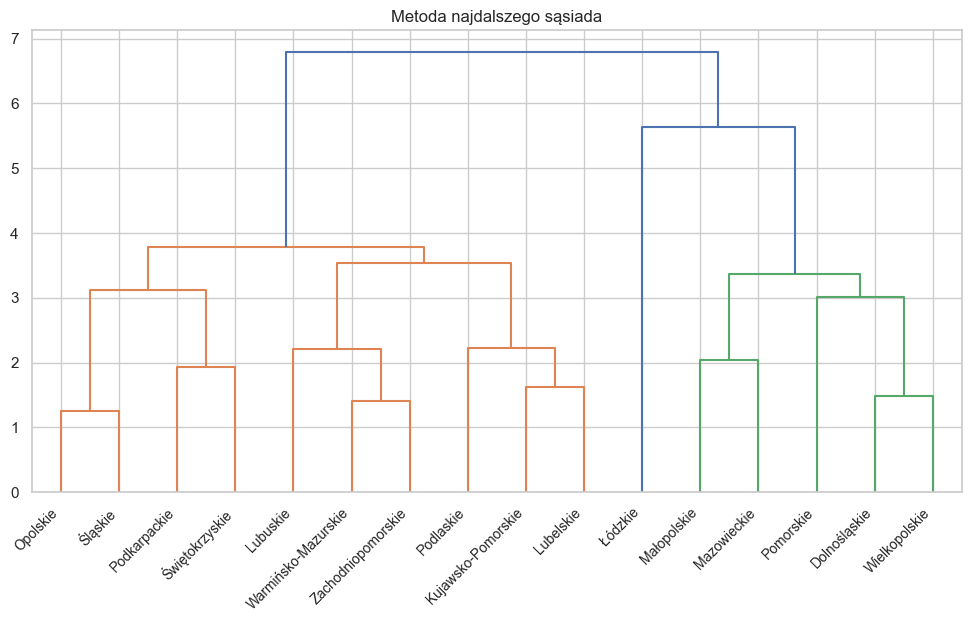

In [273]:
linkage_complete = linkage(data_clustering, method='complete', metric='euclidean')

plt.figure(figsize=(12, 6))
plt.title('Metoda najdalszego sąsiada')
dendrogram(linkage_complete, labels=data_clustering.index)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True)
plt.show()

### Grupowanie metodą średniej ważonej

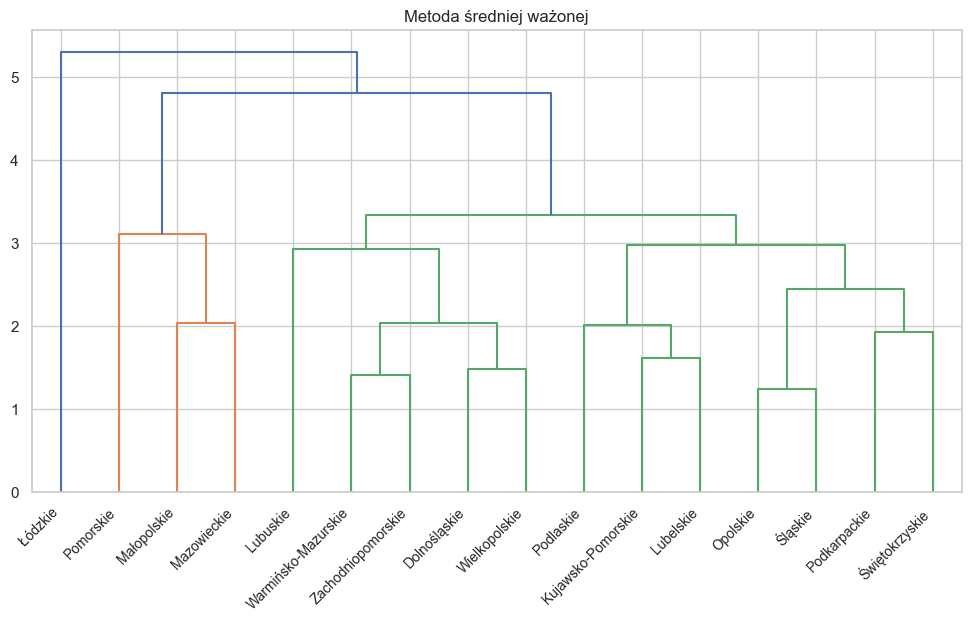

In [274]:
linkage_weighted = linkage(data_clustering, method='weighted', metric='euclidean')

plt.figure(figsize=(12, 6))
plt.title('Metoda średniej ważonej')
dendrogram(linkage_weighted, labels=data_clustering.index)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True)
plt.show()

W procesie wyboru optymalnej metody tworzenia dendrogramu kluczowym kryterium jestanaliza współczynnika korelacji kofenetycznej. Współczynnik ten dostarcza informacji o zgodności procesu grupowania z rzeczywistymi podobieństwami lub różnicami występującymi pomiędzy obserwacjami w danych. Wysoka wartość współczynnika świadczy o tym, że dendrogram wiernie reprezentuje strukturę podobieństw lub różnic między analizowanymi obiektami, pozwalającna trafniejsze wnioskowanie na podstawie wyników analizy skupień.

Obliczenie współczynnika korelacji kofenetycznej:

In [275]:
kof_ward = cophenet(linkage_ward, pdist(data_clustering))
kof_average = cophenet(linkage_average, pdist(data_clustering))
kof_single = cophenet(linkage_single, pdist(data_clustering))
kof_complete = cophenet(linkage_complete, pdist(data_clustering))
kof_centroid = cophenet(linkage_centroid, pdist(data_clustering))
kof_weighted = cophenet(linkage_weighted, pdist(data_clustering))

print(f"Współczynnik kofenetyczny dla metody Warda: {round(kof_ward[0], 4)}")
print(f"Współczynnik kofenetyczny dla metody średniej grupowej: {round(kof_average[0], 4)}")
print(f"Współczynnik kofenetyczny dla metody najbliszego sąsiada: {round(kof_single[0], 4)}")
print(f"Współczynnik kofenetyczny dla metody najdalszego sąsiada: {round(kof_complete[0], 4)}")
print(f"Współczynnik kofenetyczny dla metody centroidalnej: {round(kof_centroid[0], 4)}")
print(f"Współczynnik kofenetyczny dla metody średniej ważonej: {round(kof_weighted[0], 4)}")

Współczynnik kofenetyczny dla metody Warda: 0.7254
Współczynnik kofenetyczny dla metody średniej grupowej: 0.7952
Współczynnik kofenetyczny dla metody najbliszego sąsiada: 0.6596
Współczynnik kofenetyczny dla metody najdalszego sąsiada: 0.7517
Współczynnik kofenetyczny dla metody centroidalnej: 0.7837
Współczynnik kofenetyczny dla metody średniej ważonej: 0.7928


W związku z powyższym, najlepsza metodą okazuje się metoda średniej grupowej.

### Kryterium Mojeny

In [276]:
def mojena(linkage_method, metric):
    linkage_matrix = linkage(data_clustering, method=linkage_method, metric=metric)
    heights = linkage_matrix[:, 2] 
    heights_with_zero = np.insert(heights, 0, 0) # dodanie zera na początku zgodnie z tym co robiliśmy w R na zajęciach
    mean_height = np.mean(heights_with_zero)
    std_height = np.std(heights_with_zero, ddof=1) #ddof=1 to odchylenie dla próby n-1 (w domysle w pythonie jest dla populacji n)
    a = 0.7
    mojena_threshold = mean_height + a * std_height
    return mojena_threshold

mojena_average = mojena('average', 'euclidean')
print("Próg cięcia według kryterium Mojeny dla metody średniej grupowej:", mojena_average)

Próg cięcia według kryterium Mojeny dla metody średniej grupowej: 3.2853889367626703


### Linia przecięcia dendogramów na podstawie kryterium Mojeny

In [277]:
clusters_average = fcluster(linkage_average, mojena_average, criterion='distance')

df_clusters_average = data_clustering.copy()
df_clusters_average['cluster'] = clusters_average
df_clusters_average

,X5,X6,X7,X8,X9,X12,X13,X16,cluster
Województwo,,,,,,,,,
Dolnośląskie,6.45,5.42,6.94,1.73,2.35,2.99,0.80,0.82,3
Kujawsko-Pomorskie,3.82,2.86,5.65,2.55,2.28,2.35,0.53,1.36,2
Lubelskie,3.85,2.44,6.56,1.41,2.60,2.35,0.23,1.01,2
Lubuskie,5.06,3.37,4.95,1.23,1.73,4.94,0.15,1.32,3
Łódzkie,9.22,3.08,6.22,1.01,1.96,2.14,2.24,0.77,4
Małopolskie,6.49,4.08,9.27,1.20,3.12,2.86,0.47,0.77,1
Mazowieckie,5.25,5.41,9.14,1.05,2.54,2.34,0.94,0.74,1
Opolskie,4.62,1.87,5.01,1.60,2.11,2.67,1.65,0.87,2
Podkarpackie,5.09,2.18,5.82,1.03,2.88,3.83,0.10,0.87,2


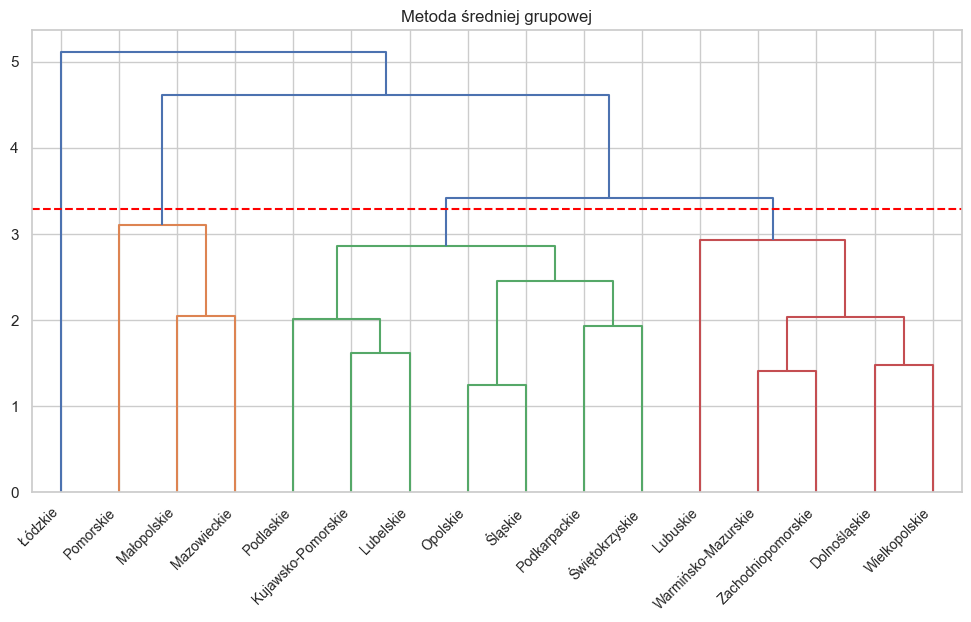

In [278]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_average, color_threshold=mojena_average, labels=data_clustering.index)
plt.axhline(y=mojena_average, color='red', linestyle='dashed')
plt.title('Metoda średniej grupowej')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True)
plt.show()

Stosując kryterium Mojeny, które umożliwia wybór optymalnej liczby klastrów na podstawie dostępnych  danych,  wyodrębniono  cztery  klastry.  Pierwsze  skupienie  obejmuje  województwa Pomorskie,  Małopolskie  i  Mazowieckie.  Drugie  skupienie to  województwaPodlaskie,  Kujawsko-Pomorskie, Lubelskie, Opolskie, Śląskie, Podkarpackiei Świętokrzyskie. Trzecie skupienie grupujewojewództwa Lubuskie, Warmińsko-Mazurskie, Zachodniopomorskie, Dolnośląskie i Wielkopolskie. Natomiast czwarte skupienie to województwo Łódzkie.

### Wykres średnich dla klastrów

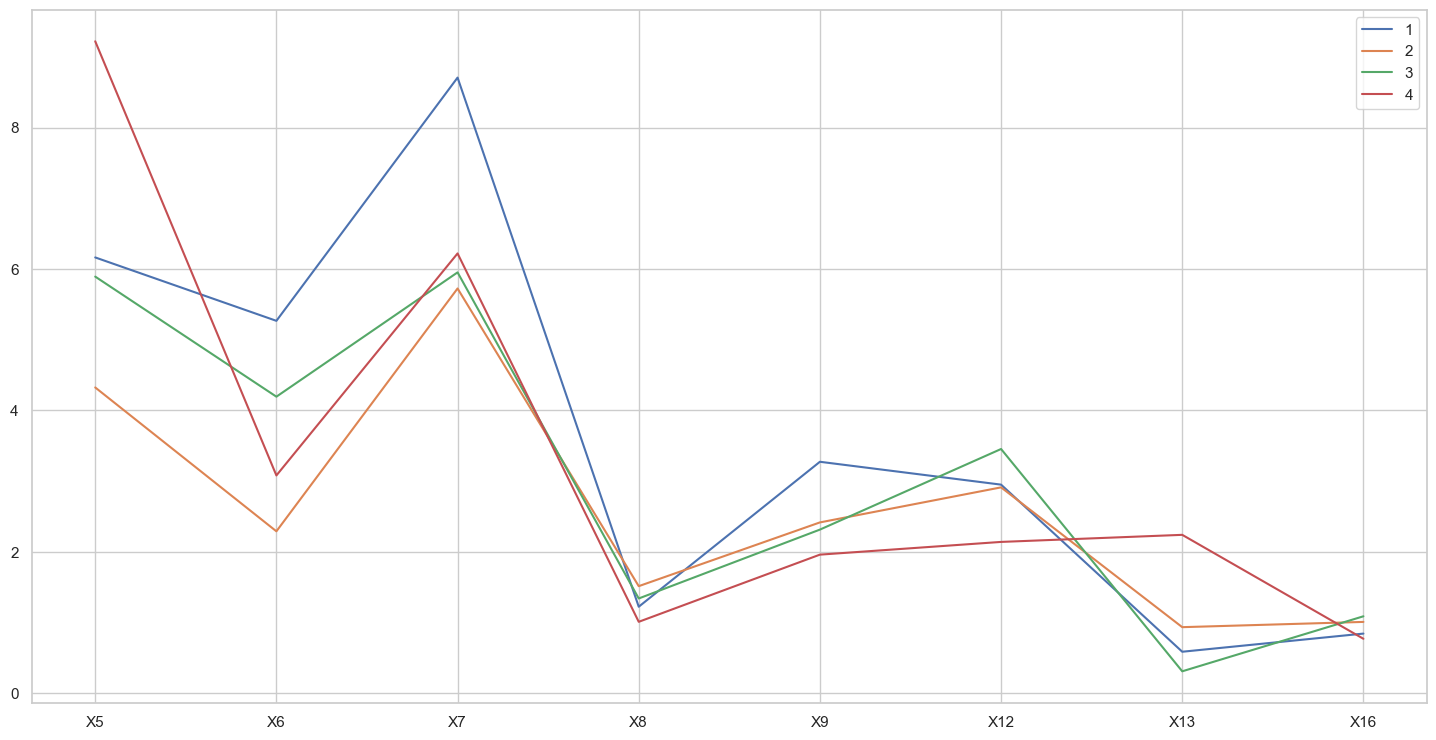

In [279]:
agg = df_clusters_average.groupby(['cluster']).mean()

plt.figure(figsize=(18, 9))
for index in agg.index:
    row = agg.loc[index, :]
    plt.plot(row, label=index)
    plt.xticks(range(len(data_clustering.columns)), labels=list(data_clustering.columns))

plt.grid(True)
plt.legend()
plt.show()

Wykres średnich dla klastrów pokazuje, jak poszczególne województwa grupują się ze względu na analizowane kryteria. Pierwsze skupienie wyróżnia się szczególnie wysokimi wartościami dla cechX6(mieszkania oddane do użytkowania)i X9 (liczba muzeów)oraz X7 (mediana cen mieszkań), co sugeruje, że skupia ono województwa o rozwijającym się rynku mieszkaniowym i o bogatej ofercie kulturalnej. Drugie skupienie ma umiarkowane wartości dla większości zmiennych, natomiast jak widać na wykresie, jest to grupa, która ma najniższa średnią wartość zmiennej X7 (ceny mieszkań), co może wskazywać na bardziej przystępny rynek nieruchomości. Trzecie skupienie charakteryzuje się najniższą średnią dla X13 (emisja zanieczyszczeń gazowych) oraz  najwyższą wartością dla X12 (powierzchnia lasów). Ostatnie, czyli czwarte skupienie prezentuje wysokie  wartości  dla X5 (liczba wypadków samochodowych  w  populacji)  oraz  X13  (emisja  zanieczyszczeń  gazowych). Biorąc pod uwagę te czynniki oraz wyższe ceny mieszkań (X7) niż w skupieniu drugim i trzecim, można przypuszczać, że nie jest to województwo charakteryzujące się wysoką jakością życia biorąc pod uwagę analizowane cechy.

### Mapa rozmieszczenia klastrów

In [280]:
path = pwd + '/geopandas/'
woj = gpd.read_file(path)

In [281]:
woj = woj[['JPT_KOD_JE', "geometry"]]
woj.head()

,JPT_KOD_JE,geometry
0,30,"POLYGON ((18.14065 52.50609, 18.14115 52.50605..."
1,10,"POLYGON ((20.42486 51.61167, 20.42489 51.61162..."
2,28,"POLYGON ((20.29152 54.40384, 20.30025 54.40322..."
3,12,"POLYGON ((20.80878 49.35366, 20.80898 49.35375..."
4,26,"POLYGON ((19.83803 50.59001, 19.83874 50.59033..."


In [282]:
woj = woj.rename(columns={'JPT_KOD_JE': 'TERYT'})
woj

,TERYT,geometry
0,30,"POLYGON ((18.14065 52.50609, 18.14115 52.50605..."
1,10,"POLYGON ((20.42486 51.61167, 20.42489 51.61162..."
2,28,"POLYGON ((20.29152 54.40384, 20.30025 54.40322..."
3,12,"POLYGON ((20.80878 49.35366, 20.80898 49.35375..."
4,26,"POLYGON ((19.83803 50.59001, 19.83874 50.59033..."
5,24,"MULTIPOLYGON (((19.83803 50.59001, 19.83754 50..."
6,04,"POLYGON ((18.14065 52.50609, 18.14011 52.50601..."
7,16,"POLYGON ((17.74135 50.28711, 17.74138 50.28771..."
8,32,"POLYGON ((14.24969 53.92403, 14.27264 53.92417..."
9,20,"POLYGON ((23.50472 54.00966, 23.50232 54.00845..."


In [283]:
teryt_to_wojewodztwo = {
    '02': 'Dolnośląskie',
    '04': 'Kujawsko-Pomorskie',
    '06': 'Lubelskie',
    '08': 'Lubuskie',
    '10': 'Łódzkie',
    '12': 'Małopolskie',
    '14': 'Mazowieckie',
    '16': 'Opolskie',
    '18': 'Podkarpackie',
    '20': 'Podlaskie',
    '22': 'Pomorskie',
    '24': 'Śląskie',
    '26': 'Świętokrzyskie',
    '28': 'Warmińsko-Mazurskie',
    '30': 'Wielkopolskie',
    '32': 'Zachodniopomorskie'
}
woj['nazwa'] = woj['TERYT'].map(teryt_to_wojewodztwo)
woj

,TERYT,geometry,nazwa
0,30,"POLYGON ((18.14065 52.50609, 18.14115 52.50605...",Wielkopolskie
1,10,"POLYGON ((20.42486 51.61167, 20.42489 51.61162...",Łódzkie
2,28,"POLYGON ((20.29152 54.40384, 20.30025 54.40322...",Warmińsko-Mazurskie
3,12,"POLYGON ((20.80878 49.35366, 20.80898 49.35375...",Małopolskie
4,26,"POLYGON ((19.83803 50.59001, 19.83874 50.59033...",Świętokrzyskie
5,24,"MULTIPOLYGON (((19.83803 50.59001, 19.83754 50...",Śląskie
6,04,"POLYGON ((18.14065 52.50609, 18.14011 52.50601...",Kujawsko-Pomorskie
7,16,"POLYGON ((17.74135 50.28711, 17.74138 50.28771...",Opolskie
8,32,"POLYGON ((14.24969 53.92403, 14.27264 53.92417...",Zachodniopomorskie
9,20,"POLYGON ((23.50472 54.00966, 23.50232 54.00845...",Podlaskie


<Axes: >

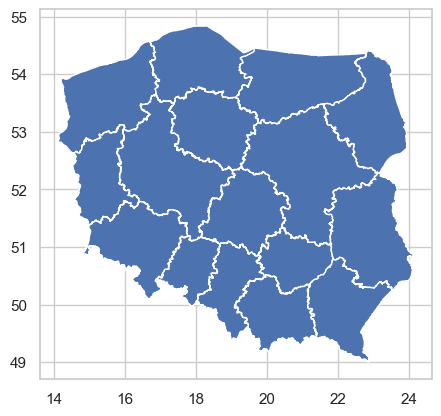

In [284]:
woj.plot()

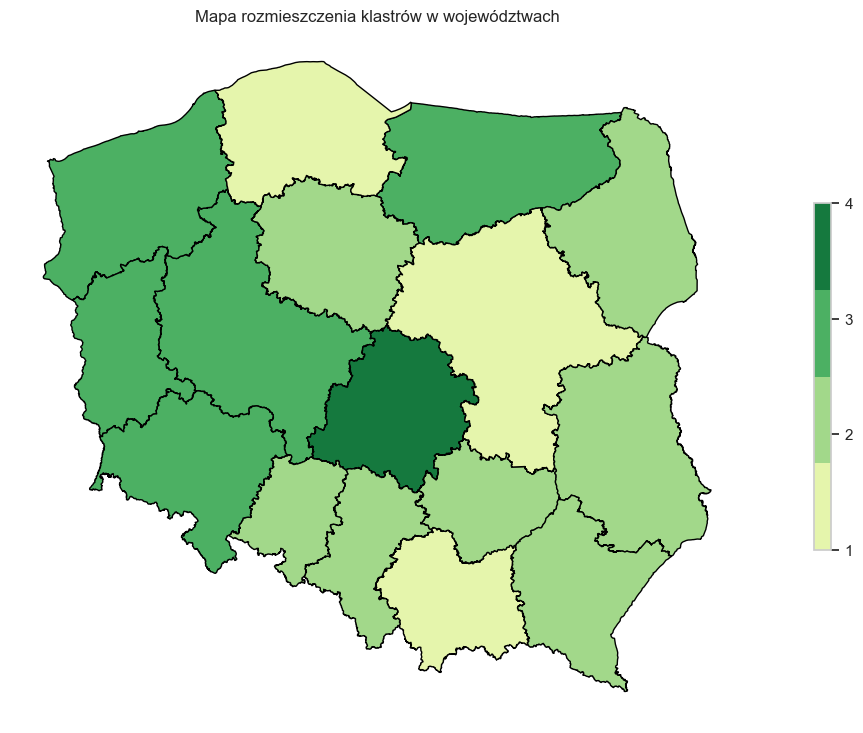

In [285]:
df_clusters_average = df_clusters_average.reset_index()
merged = woj.merge(df_clusters_average, left_on='nazwa', right_on='Województwo')

fig, ax = plt.subplots(1, figsize=(18, 9))
cmap = ListedColormap(sns.color_palette("YlGn", n_colors=merged['cluster'].nunique()))
plot = merged.plot(column='cluster', ax=ax, legend=False, cmap=cmap, edgecolor='black')
plt.axis('off')
plt.title('Mapa rozmieszczenia klastrów w województwach')


unique_clusters = sorted(merged['cluster'].unique())
cbar = plot.get_figure().colorbar(plot.collections[0], ax=ax, ticks=unique_clusters, shrink=0.5)
cbar.ax.set_yticklabels(unique_clusters)

plt.show()

## 4. Porządkowanie liniowe

Porządkowanie liniowe to metoda organizacji zbioru obiektów, gdzie każdy obiekt jest oceniany i numerowany na podstawie jednej, wybranej cechy. W ten sposób, wszystkie obiekty w zbiorze są uszeregowane w określonej kolejności, zaczynając od obiektu uznawanego za najlepszy, kończąc na obiekcie uznawanym za najgorszy. Głównym celem tego typu porządkowania jest uporządkowanie obiektów zgodnie z konkretnym kryterium, co umożliwia łatwe porównywanie i ocenianie  ich względem siebie. Stosuje się je przede wszystkim w sytuacjach, gdy potrzebna jest ocena grupy obiektów, ułatwiająca podjęcie decyzji lub dalszą analizę.

Metody porządkowania liniowego często klasyfikują cechy jako stymulanty, destymulanty i nominanty. Stymulanty to zmienne, których wyższe wartości wskazują na lepszy wynik lub pożądany stan. Z drugiej strony, destymulanty to zmienne,których niższa wartość jest pożądana. Nominanty to zmienne neutralne, których wartości nie wpływają bezpośrednio na lepsze lub gorsze pozycjonowanie obiektu w rankingu.

### Określenie stymulantów i destymulantów

* "X5": "Liczba wypadków na 10 tyś ludności", D
* "X6": "Mieszkania oddane do użytkowania na 1 tyś ludności", S
* "X7": "Mediana cen mieszkan w tysiącach", D
* "X8": "Liczba imprez przypadających na 10 tyś mieszkańców", S
* "X9": "Liczba muzeów przypadająca na 100 tyś mieszkańców", S
* "X12": "Powierzchnia lasów przypadająca na 10 km^2 powierzchni", S
* "X13": "Emisja zanieczyszczeń gazowych na 1 tys km^2 ( w tysiącach)", D
* "X16": "Rodziny, którym przyznano świadczenia z powodu ubóstwa na 100 ludności", D

In [286]:
# stymulanty dla data_clustering
s = [False, True, False, True, True, True, False, False]

In [287]:
data = data_clustering

In [288]:
wsp_zmienn = (data.std(ddof=0) / data.mean()) * 100
sum_wsp_zmienn = wsp_zmienn.sum()

### Hellwig (klasyczny)

In [289]:
df_scaled = (data - data.mean()) / data.std(ddof=0)

# utworzenie wzorca i antywzorca z uwzględnieniem stymulantów i destymulantów (if s: data.max(), else: data.min()
wzorzec = np.where(s, df_scaled.max(), df_scaled.min())
antywzorzec = np.where(s, df_scaled.min(), df_scaled.max())

# obliczenie odległości i miary podobieństwa na standaryzowanych danych
d0 = np.sqrt(((wzorzec - antywzorzec)**2).sum())
y_df = (df_scaled - wzorzec)**2

di0 = np.sqrt(y_df.sum(axis=1))
mi = 1 - (di0 / d0)


mi = mi.sort_values(ascending=False)
hellwig = pd.DataFrame(mi, columns=['Miara']).reset_index() 
hellwig.set_index('Województwo', inplace=True)
hellwig.round(4)

,Miara
Województwo,
Pomorskie,0.5378
Dolnośląskie,0.4779
Zachodniopomorskie,0.4643
Podkarpackie,0.4621
Wielkopolskie,0.4323
Kujawsko-Pomorskie,0.4225
Lubelskie,0.4100
Lubuskie,0.4018
Małopolskie,0.3894


### Hellwig z wagami współczynnika zmienności

In [290]:
wsp_zmienn = (data.std(ddof=0) / data.mean()) * 100
sum_wsp_zmienn = wsp_zmienn.sum()
wagi = wsp_zmienn / sum_wsp_zmienn

# wazenie danych
data_w = ((data - data.mean()) / data.std(ddof=0)) * wagi
data_w

# wzorce po przewazneiu
wzorzec = np.where(s, data_w.max(), data_w.min())
antywzorzec = np.where(s, data_w.min(), data_w.max())

# obliczenie odległości miedzy wzrocem i antywzorcem
d0 = np.sqrt(((wzorzec - antywzorzec)**2).sum())
y_df = (data_w - wzorzec)**2

di0 = np.sqrt(y_df.sum(axis=1))
mi = 1 - (di0 / d0)

#############  zmienna agregatowa
di0_2 = di0.mean()+(2*di0.std(ddof=0))
qi = 1-(di0/di0_2)


mi = mi.sort_values(ascending=False)
hellwig_wght = pd.DataFrame(mi , columns=['Miara']).reset_index() 
hellwig_wght.set_index('Województwo', inplace=True)
hellwig_wght.round(4)

,Miara
Województwo,
Pomorskie,0.6952
Zachodniopomorskie,0.6399
Wielkopolskie,0.6298
Dolnośląskie,0.6200
Małopolskie,0.5964
Kujawsko-Pomorskie,0.5962
Lubuskie,0.5960
Podkarpackie,0.5933
Lubelskie,0.5898


### Metoda TOPSIS

In [291]:
# przekształcenie ilorazowe
sqrt_sums = np.sqrt((data ** 2).sum(axis=0))
transf = data / sqrt_sums

# wzorce po przekształceniu ilorazowym
wzorzec = np.where(s, transf.max(), transf.min())
antywzorzec = np.where(s, transf.min(), transf.max())

# odleglosci obiektow od wzorca/antywzorca
di0plus = np.sqrt(((transf - wzorzec)**2).sum(axis=1))
di0minus = np.sqrt(((transf - antywzorzec)**2).sum(axis=1))

# qi

qi = di0minus/(di0minus+di0plus)
qi = qi.sort_values(ascending=False)


topsis = pd.DataFrame(qi, columns=['Miara']).reset_index() 
topsis.set_index('Województwo', inplace=True)
topsis.round(4)

,Miara
Województwo,
Pomorskie,0.6900
Zachodniopomorskie,0.6299
Wielkopolskie,0.6249
Lubuskie,0.6153
Podkarpackie,0.6126
Dolnośląskie,0.6112
Kujawsko-Pomorskie,0.6075
Podlaskie,0.6019
Warmińsko-Mazurskie,0.5992


### Metoda sum standaryzowanych

In [292]:
df = data.copy()

transf = np.where(s, (df - df.mean()) / df.std(ddof=0), (df.mean() - df) / df.std(ddof=0))
transf_df = pd.DataFrame(transf, columns=df.columns, index=df.index)

summs = transf_df.sum(axis=1)
wi = summs/len(transf_df.columns)
wi2 = wi-wi.min()
wt = wi2/wi2.max()
wt = wt.sort_values(ascending=False)


wt_df = pd.DataFrame(wt, columns=['Miara']).reset_index() 
wt_df.set_index('Województwo', inplace=True)
wt_df.round(4)

,Miara
Województwo,
Pomorskie,1.0000
Podkarpackie,0.7881
Lubuskie,0.7753
Kujawsko-Pomorskie,0.7603
Dolnośląskie,0.7369
Zachodniopomorskie,0.7188
Wielkopolskie,0.6986
Lubelskie,0.6205
Śląskie,0.6130


### Metoda dystansów

In [293]:
df = data.copy()

transf = np.where(s, df / df.max(), df.min() / df)
transf_df = pd.DataFrame(transf, index=df.index, columns=df.columns)
wi = transf_df.mean(axis=1)
wi = wi.sort_values(ascending=False)

dist = pd.DataFrame(wi, columns=['Miara'])
dist.round(4)

,Miara
Województwo,
Pomorskie,0.6494
Warmińsko-Mazurskie,0.6412
Podkarpackie,0.6341
Podlaskie,0.6330
Lubuskie,0.6196
Śląskie,0.6026
Dolnośląskie,0.5923
Wielkopolskie,0.5919
Kujawsko-Pomorskie,0.5894


### Ranking na podstawie średnich wyników z wszystkich metod porządkowania liniowego

In [294]:
df1 = hellwig.reindex(data.index)
df2 = hellwig_wght.reindex(data.index)
df3 = topsis.reindex(data.index)
df4 = wt_df.reindex(data.index)
df5 = dist.reindex(data.index)

rank = [df.rank().reindex(data.index) for df in [df1, df2, df3, df4, df5]]

ranked = sum(rank) / len(rank)
ranked = ranked.sort_values(by='Miara', ascending=False)
ranked

,Miara
Województwo,
Pomorskie,16.0
Podkarpackie,12.6
Zachodniopomorskie,12.4
Dolnośląskie,12.2
Wielkopolskie,11.8
Lubuskie,11.6
Kujawsko-Pomorskie,10.6
Warmińsko-Mazurskie,8.6
Lubelskie,8.0


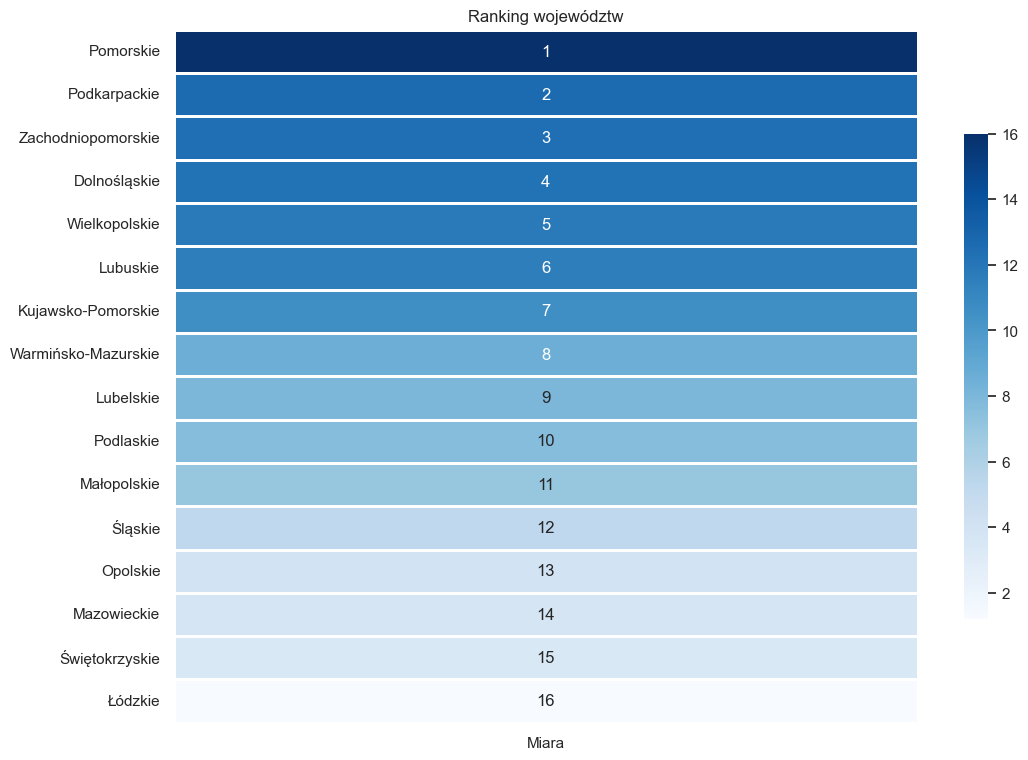

In [295]:
annot = np.arange(1, len(ranked) + 1).reshape(-1, 1) # indeksy rankingu

plt.figure(figsize=(12, 9))
sns.heatmap(ranked, cmap='Blues', annot=annot, linewidths=.9, cbar_kws={"shrink": .7})
plt.xlabel('')
plt.ylabel('')
plt.title('Ranking województw')
plt.show()

W powyższym rankingu przedstawiono uśrednione pozycje województw zastosowanych metod porządkowania liniowego, tym samym ułatwiając identyfikację tych, które średnio zajmowały najwyższe oraz najniższe miejsca. Najwyższa jakość życia można zaobserwować kolejno w województwach: Pomorskim, Podkarpackim i Zachodniopomorskim. Z kolei najniższą jakość życia odnotowano w województwach: Mazowieckim, Świętokrzyskim oraz Łódzkim.